In [1]:
# Paquete para administrar la conexión a la base de datos
import pymongo

In [2]:
# Datos de la conexión
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

# Base de datos
mydb = myclient["kanban"]

# Colección de la base de datos
mycol = mydb["encRes"]

# Verificación si existe la base de datos
dblist = myclient.list_database_names()
if "kanban" in dblist:
  print("The database exists.")

# Verificación si existe la colección
collist = mydb.list_collection_names()
if "encRes" in collist:
  print("The collection exists.")

The database exists.
The collection exists.


In [3]:
# Variables

# Nombre del juego del que se tienen encuestas
nombre = "Featureban V3"

# Tipo de encuesta
tipo = ["previa", "posterior"]

# Fecha de aplicación de la encuesta
fecha = "2019-11-01"

# preguntas de la encuesta del tipo previa
preguntas_previas = [
    "Edad",
    "Genero",
    "¿Último nivel de estudio?",
    "Experiencia con kanban", 
    "Visualizar el trabajo", 
    "Hacer las políticas explícitas",
    "Implementar ciclos de retroalimentación",
    "Limitar el trabajo en progreso",
    "Gestionar el flujo",
    "Mejorar colaborativamente, evolucionar experimentalmente",
    "Tiempo de ciclo",
    "Trabajo en proceso",
    "Throughput",
    "Slack",
    "Little's Law",
    "Push System",
    "Pull System"
            ]

# Preguntas de la encuesta del tipo posterior
preguntas_posterior = [     
    "Visualizar el trabajo", 
    "Hacer las políticas explícitas",
    "Implementar ciclos de retroalimentación",
    "Limitar el trabajo en progreso",
    "Gestionar el flujo",
    "Mejorar colaborativamente, evolucionar experimentalmente",
    "Tiempo de ciclo",
    "Trabajo en proceso",
    "Throughput",
    "Slack",
    "Little's Law",
    "Push System",
    "Pull System",
    "Cuando participé en la actividad de los barcos de papel",
    "Cuando jugué Featureban",
    "Jugar juegos me ayuda a reforzar lo que aprendí con lecturas o lecciones de un instructor",
    "Jugar juegos me motiva para aprender acerca de un tema",
    "Prefiero jugar juegos para aprender un tema",
    "Este elemento de la práctica de los barcos de papel me ayudó a conocer los conceptos de Kanban",
    "Este elemento del juego de Featureban me ayudó a conocer mejor los conceptos de Kanban",
    "El tiempo de la práctica de los barcos de papel me pareció",
    "El tiempo de juego de Featureban me pareció",
    "En general, el tiempo del taller me pareció",
    "Prefiero que el instructor explique la teoría",
    "En general, considero que los juegos serios son"
            ]

In [4]:
# Paquete para análisis de datos
import pandas as pd

# Variables para cada dataframe del tipo de encuesta
data_previa = ""
data_posterior = ""

# Iteramos entre tipos de encuestas 
for a in tipo:
    # Para las encuestas previas
    if a == "previa":
        # Creamos una lista vacía para almacenar los arreglos de respuestas
        listResp = []
        
        # Creamos el pipeline para obtener los arreglos de respuestas para cada pregunta, según el tipo y fecha de la 
        # encuesta
        for pregunta in preguntas_previas:
            pipeline = [
                {"$match": { "nombre" : nombre, "tipo" : a, "fecha_aplicacion" : fecha }}, 
                {"$unwind": { "path": "$preguntas"}}, 
                {"$match": { "preguntas.pregunta" : pregunta}}        
            ]
   
            # Ejecutamos el query para cada pregunta y guardamos las respuestas en la lista listRes
            result = mycol.aggregate(pipeline)            
            for i in result:
                registro = i.get("preguntas").get("respuestas")      
                listResp.append(registro)                
            
            # Creamos un diccionario con la lista de nombres y la lista de respuestas
            colNames = list(preguntas_previas)
            dic = dict(zip(colNames, listResp))
            
            # Creamos un dataframe de las encuestas del tipo previa con el diccionario
            data_previa = pd.DataFrame(data = dic)
    # Para las encuestas posteriores
    else:
        # Creamos una lista vacía para almacenar los arreglos de respuestas
        listResp = []
        
        # Creamos el pipeline para obtener los arreglos de respuestas para cada pregunta, según el tipo y fecha de la 
        # encuesta
        for pregunta in preguntas_posterior:
            pipeline = [
                {"$match": { "tipo" : a, "fecha_aplicacion" : fecha }}, 
                {"$unwind": { "path": "$preguntas"}}, 
                {"$match": { "preguntas.pregunta" : pregunta}}        
            ]            
   
            # Ejecutamos el query para cada pregunta y guardamos las respuestas en la lista listRes            
            result = mycol.aggregate(pipeline)   
            for i in result:
                registro = i.get("preguntas").get("respuestas")      
                listResp.append(registro)
                
            # Creamos un diccionario con la lista de nombres y la lista de respuestas
            colNames = list(preguntas_posterior)
            dic = dict(zip(colNames, listResp))
            
            # Creamos un dataframe de las encuestas del tipo posterior con el diccionario
            data_posterior = pd.DataFrame(data = dic)

            
# Verificamos que se hayan creado correctamente los dataframes
#print(data_previa.head(2))
#print(data_posterior.head(2))

In [5]:
# convertimos las respuestas que son categoricas a su tipo correspondiente

# Primero definimos las categorias para cada pregunta
edad_cat = pd.api.types.CategoricalDtype(categories=["Menos de 18 años",
                                                     "18 - 23 años",
                                                     "24 - 29 años",
                                                     "30 - 35 años",
                                                     "Más de 35 años"], ordered=True)

# Para genero
genero_cat = pd.api.types.CategoricalDtype(categories=["Femenino",
                                                         "Masculino",], ordered=True)

# Para último nivel de estudios
estudios_cat = pd.api.types.CategoricalDtype(categories=["Nivel básico terminado",
                                                       "Preparatoria",
                                                       "Técnico",
                                                       "Licenciatura",
                                                       "Maestría",
                                                       "Doctorado",
                                                       "Postdoctorado"], ordered=True)

# Por último para experiencia en Kanban, donde 1 es nada de experiencia y 5 es implementado
experiencia_cat = pd.api.types.CategoricalDtype(categories=["1",
                                                            "2",
                                                            "3",
                                                            "4",
                                                            "5"], ordered=True)

# Primero para el dataframe de las encuesta previa
data_previa["Edad"] = data_previa["Edad"].astype(edad_cat)
data_previa["Genero"] = data_previa["Genero"].astype(genero_cat)
data_previa["¿Último nivel de estudio?"] = data_previa["¿Último nivel de estudio?"].astype(estudios_cat)
data_previa["Experiencia con kanban"] = data_previa["Experiencia con kanban"].astype("int").astype("str").astype(experiencia_cat)
data_previa["Visualizar el trabajo"] = data_previa["Visualizar el trabajo"].astype("int")
data_previa["Hacer las políticas explícitas"] = data_previa["Hacer las políticas explícitas"].astype("int")
data_previa["Implementar ciclos de retroalimentación"] = data_previa["Implementar ciclos de retroalimentación"].astype("int")
data_previa["Limitar el trabajo en progreso"] = data_previa["Limitar el trabajo en progreso"].astype("int")
data_previa["Gestionar el flujo"] = data_previa["Gestionar el flujo"].astype("int")
data_previa["Mejorar colaborativamente, evolucionar experimentalmente"] = data_previa["Mejorar colaborativamente, evolucionar experimentalmente"].astype("int")
data_previa["Tiempo de ciclo"] = data_previa["Tiempo de ciclo"].astype("int")
data_previa["Trabajo en proceso"] = data_previa["Trabajo en proceso"].astype("int")
data_previa["Throughput"] = data_previa["Throughput"].astype("int")
data_previa["Slack"] = data_previa["Slack"].astype("int")
data_previa["Little's Law"] = data_previa["Little's Law"].astype("int")
data_previa["Push System"] = data_previa["Push System"].astype("int")
data_previa["Pull System"] = data_previa["Pull System"].astype("int")

# Después para el dataframe de las encuesta posterior

# Para cada pregunta
diversion = pd.api.types.CategoricalDtype(categories=["Me divertí pero no aprendí",
                                                           "Me divertí y aprendí",
                                                           "No me divertí pero aprendí",
                                                           "No me divertí y no aprendí"], ordered=True)

reforzar_aprendizaje = pd.api.types.CategoricalDtype(categories=["No me ayuda",
                                                                 "Me ayuda un poco",
                                                                 "Me ayuda",
                                                                 "Me ayuda mucho"], ordered=True)

motiva_aprender = pd.api.types.CategoricalDtype(categories=["No me motiva",
                                                            "Me motiva un poco",
                                                            "Me motiva",
                                                            "Me motiva mucho"], ordered=True)

taller_juegos = pd.api.types.CategoricalDtype(categories=["Al inicio del taller",
                                                          "A la mitad del taller",
                                                          "Al final del taller"], ordered=True)

elemento_practica = pd.api.types.CategoricalDtype(categories=["Ningún elemento",
                                                              "Las reglas de la práctica",
                                                              "La explicación del instructor",
                                                              "La simulación de una línea de producción",
                                                              "La diferencia entre enfoques de producción",
                                                              "Todos los elementos"], ordered=True)

elemento_featureban = pd.api.types.CategoricalDtype(categories=["Ningún elemento",
                                                                "Las reglas del juego",
                                                                "El tablero del juego",
                                                                "Los post its",
                                                                "Todos los elementos"], ordered=True)

tiempo = pd.api.types.CategoricalDtype(categories=["Corto",
                                                   "Regular",
                                                   "Largo",
                                                   "No sentí el pasar del tiempo",
                                                   "Exhaustivo"], ordered=True)

juegos_lecturas = pd.api.types.CategoricalDtype(categories=["Exclusivamente con lecturas",
                                                            "Sus lecturas combinadas con juegos serios",
                                                            "Solo juegos serios"], ordered=True)

juegos_serios = pd.api.types.CategoricalDtype(categories=["Innecesarios",
                                                          "Sin importancia",
                                                          "Necesarios",
                                                          "Esenciales"], ordered=True)

data_posterior["Cuando participé en la actividad de los barcos de papel"] = data_posterior["Cuando participé en la actividad de los barcos de papel"].astype(diversion)
data_posterior["Cuando jugué Featureban"] = data_posterior["Cuando jugué Featureban"].astype(diversion)
data_posterior["Jugar juegos me ayuda a reforzar lo que aprendí con lecturas o lecciones de un instructor"] = data_posterior["Jugar juegos me ayuda a reforzar lo que aprendí con lecturas o lecciones de un instructor"].astype(reforzar_aprendizaje)
data_posterior["Jugar juegos me motiva para aprender acerca de un tema"] = data_posterior["Jugar juegos me motiva para aprender acerca de un tema"].astype(motiva_aprender)
data_posterior["Prefiero jugar juegos para aprender un tema"] = data_posterior["Prefiero jugar juegos para aprender un tema"].astype(taller_juegos)
data_posterior["Este elemento de la práctica de los barcos de papel me ayudó a conocer los conceptos de Kanban"] = data_posterior["Este elemento de la práctica de los barcos de papel me ayudó a conocer los conceptos de Kanban"].astype(elemento_practica)
data_posterior["Este elemento del juego de Featureban me ayudó a conocer mejor los conceptos de Kanban"] = data_posterior["Este elemento del juego de Featureban me ayudó a conocer mejor los conceptos de Kanban"].astype(elemento_featureban)
data_posterior["El tiempo de la práctica de los barcos de papel me pareció"] = data_posterior["El tiempo de la práctica de los barcos de papel me pareció"].astype(tiempo)
data_posterior["El tiempo de juego de Featureban me pareció"] = data_posterior["El tiempo de juego de Featureban me pareció"].astype(tiempo)
data_posterior["En general, el tiempo del taller me pareció"] = data_posterior["En general, el tiempo del taller me pareció"].astype(tiempo)
data_posterior["Prefiero que el instructor explique la teoría"] = data_posterior["Prefiero que el instructor explique la teoría"].astype(juegos_lecturas)
data_posterior["En general, considero que los juegos serios son"] = data_posterior["En general, considero que los juegos serios son"].astype(juegos_serios)
data_posterior["Visualizar el trabajo"] = data_posterior["Visualizar el trabajo"].astype("int")
data_posterior["Hacer las políticas explícitas"] = data_posterior["Hacer las políticas explícitas"].astype("int")
data_posterior["Implementar ciclos de retroalimentación"] = data_posterior["Implementar ciclos de retroalimentación"].astype("int")
data_posterior["Limitar el trabajo en progreso"] = data_posterior["Limitar el trabajo en progreso"].astype("int")
data_posterior["Gestionar el flujo"] = data_posterior["Gestionar el flujo"].astype("int")
data_posterior["Mejorar colaborativamente, evolucionar experimentalmente"] = data_posterior["Mejorar colaborativamente, evolucionar experimentalmente"].astype("int")
data_posterior["Tiempo de ciclo"] = data_posterior["Tiempo de ciclo"].astype("int")
data_posterior["Trabajo en proceso"] = data_posterior["Trabajo en proceso"].astype("int")
data_posterior["Throughput"] = data_posterior["Throughput"].astype("int")
data_posterior["Slack"] = data_posterior["Slack"].astype("int")
data_posterior["Little's Law"] = data_posterior["Little's Law"].astype("int")
data_posterior["Push System"] = data_posterior["Push System"].astype("int")
data_posterior["Pull System"] = data_posterior["Pull System"].astype("int")

# Comprobamos que todo este correcto
#print(data_previa.dtypes)
#print(data_posterior.dtypes)

In [6]:
# Análisis y visualización de datos

# Paquetes requeridos
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [7]:
# Datos estadísticos de la encuesta previa
data_previa.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count              12.000000                       12.000000   
mean                1.500000                        1.666667   
std                 2.576114                        2.902455   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000                        0.000000   
75%                 1.500000                        2.250000   
max                 8.000000                       10.000000   

       Implementar ciclos de retroalimentación  \
count                                12.000000   
mean                                  1.833333   
std                                   2.886751   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.500000   
75%                                   3.000000   
max                                  10.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                       12.000000           12.000000   
mean                         1.166667            1.166667   
std                          1.585923            1.585923   
min                          0.000000            0.000000   
25%                          0.000000            0.000000   
50%                          0.500000            0.500000   
75%                          2.000000            2.000000   
max                          5.000000            5.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                          12.000000          
mean                                            1.500000          
std                                             1.882938          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.500000          
75%                                             2.500000          
max                                             5.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count        12.000000           12.000000   12.000000   12.0          12.0   
mean          1.416667            1.750000    0.500000    0.0           0.0   
std           1.880925            1.864745    1.167748    0.0           0.0   
min           0.000000            0.000000    0.000000    0.0           0.0   
25%           0.000000            0.000000    0.000000    0.0           0.0   
50%           0.000000            1.500000    0.000000    0.0           0.0   
75%           3.000000            3.250000    0.250000    0.0           0.0   
max           5.000000            5.000000    4.000000    0.0           0.0   

       Push System  Pull System  
count         12.0         12.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

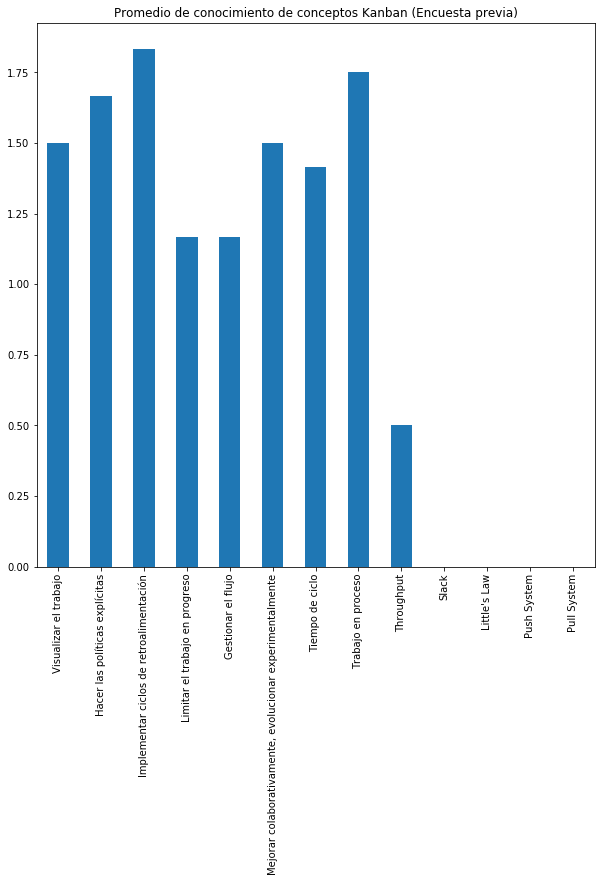

In [8]:
# Promedio de conocimiento de los conceptos de Lean Kanban de encuesta previa
data_previa.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban (Encuesta previa)")

In [9]:
# Conceptos por genero Femenino
femenino = data_previa[data_previa["Genero"] == "Femenino"]
femenino.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               8.000000                        8.000000   
mean                1.750000                        1.875000   
std                 3.058945                        3.482097   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000                        0.000000   
75%                 2.000000                        2.250000   
max                 8.000000                       10.000000   

       Implementar ciclos de retroalimentación  \
count                                 8.000000   
mean                                  2.000000   
std                                   3.505098   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   3.000000   
max                                  10.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        8.000000            8.000000   
mean                         1.250000            1.000000   
std                          1.908627            1.927248   
min                          0.000000            0.000000   
25%                          0.000000            0.000000   
50%                          0.000000            0.000000   
75%                          2.250000            0.750000   
max                          5.000000            5.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           8.000000          
mean                                            1.625000          
std                                             2.263846          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             4.000000          
max                                             5.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count          8.00000            8.000000    8.000000    8.0           8.0   
mean           1.12500            1.375000    0.500000    0.0           0.0   
std            2.10017            2.065879    1.414214    0.0           0.0   
min            0.00000            0.000000    0.000000    0.0           0.0   
25%            0.00000            0.000000    0.000000    0.0           0.0   
50%            0.00000            0.000000    0.000000    0.0           0.0   
75%            1.00000            2.500000    0.000000    0.0           0.0   
max            5.00000            5.000000    4.000000    0.0           0.0   

       Push System  Pull System  
count          8.0          8.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

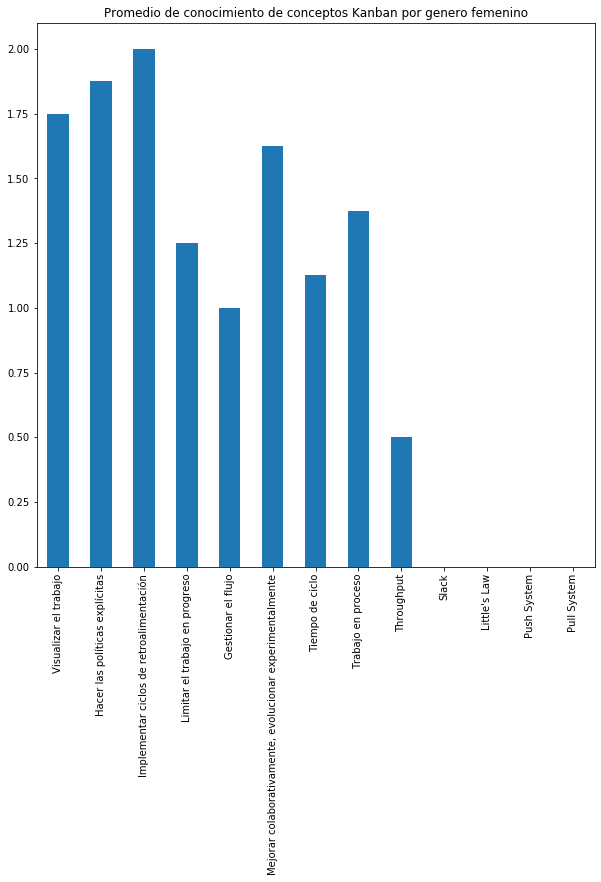

In [10]:
# Promedio de conocimiento de los conceptos de Lean Kanban por genero Femenino
femenino.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por genero femenino")

In [11]:
# Conceptos por genero Masculino
masculino = data_previa[data_previa["Genero"] == "Masculino"]
masculino.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               4.000000                            4.00   
mean                1.000000                            1.25   
std                 1.414214                            1.50   
min                 0.000000                            0.00   
25%                 0.000000                            0.00   
50%                 0.500000                            1.00   
75%                 1.500000                            2.25   
max                 3.000000                            3.00   

       Implementar ciclos de retroalimentación  \
count                                 4.000000   
mean                                  1.500000   
std                                   1.290994   
min                                   0.000000   
25%                                   0.750000   
50%                                   1.500000   
75%                                   2.250000   
max                                   3.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        4.000000             4.00000   
mean                         1.000000             1.50000   
std                          0.816497             0.57735   
min                          0.000000             1.00000   
25%                          0.750000             1.00000   
50%                          1.000000             1.50000   
75%                          1.250000             2.00000   
max                          2.000000             2.00000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           4.000000          
mean                                            1.250000          
std                                             0.957427          
min                                             0.000000          
25%                                             0.750000          
50%                                             1.500000          
75%                                             2.000000          
max                                             2.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count         4.000000            4.000000     4.00000    4.0           4.0   
mean          2.000000            2.500000     0.50000    0.0           0.0   
std           1.414214            1.290994     0.57735    0.0           0.0   
min           0.000000            1.000000     0.00000    0.0           0.0   
25%           1.500000            1.750000     0.00000    0.0           0.0   
50%           2.500000            2.500000     0.50000    0.0           0.0   
75%           3.000000            3.250000     1.00000    0.0           0.0   
max           3.000000            4.000000     1.00000    0.0           0.0   

       Push System  Pull System  
count          4.0          4.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

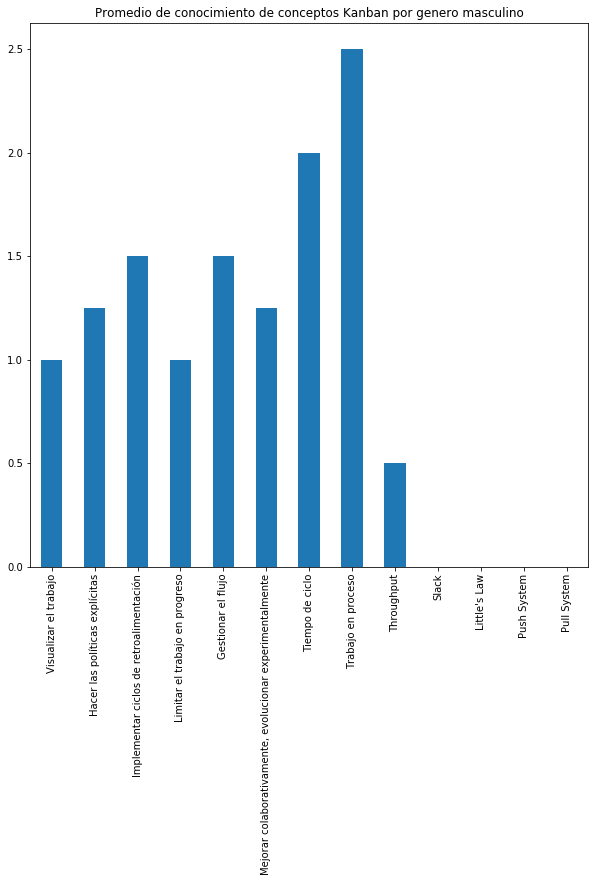

In [12]:
# Promedio de conocimiento de los conceptos de Lean Kanban por genero Femenino
masculino.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por genero masculino")

In [13]:
# Conceptos por nivel de estudios Preparatoria
preparatoria = data_previa[data_previa["¿Último nivel de estudio?"] == "Preparatoria"]
preparatoria.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count                    2.0                        2.000000   
mean                     1.0                        2.500000   
std                      0.0                        0.707107   
min                      1.0                        2.000000   
25%                      1.0                        2.250000   
50%                      1.0                        2.500000   
75%                      1.0                        2.750000   
max                      1.0                        3.000000   

       Implementar ciclos de retroalimentación  \
count                                      2.0   
mean                                       3.0   
std                                        0.0   
min                                        3.0   
25%                                        3.0   
50%                                        3.0   
75%                                        3.0   
max                                        3.0   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                             2.0            2.000000   
mean                              2.0            0.500000   
std                               0.0            0.707107   
min                               2.0            0.000000   
25%                               2.0            0.250000   
50%                               2.0            0.500000   
75%                               2.0            0.750000   
max                               2.0            1.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           2.000000          
mean                                            3.000000          
std                                             1.414214          
min                                             2.000000          
25%                                             2.500000          
50%                                             3.000000          
75%                                             3.500000          
max                                             4.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count          2.00000            2.000000    2.000000    2.0           2.0   
mean           1.50000            3.000000    0.500000    0.0           0.0   
std            2.12132            1.414214    0.707107    0.0           0.0   
min            0.00000            2.000000    0.000000    0.0           0.0   
25%            0.75000            2.500000    0.250000    0.0           0.0   
50%            1.50000            3.000000    0.500000    0.0           0.0   
75%            2.25000            3.500000    0.750000    0.0           0.0   
max            3.00000            4.000000    1.000000    0.0           0.0   

       Push System  Pull System  
count          2.0          2.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

In [14]:
# Promedio de conocimiento de los conceptos de Lean Kanban nivel de estudio preparatoria
preparatoria.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por nivel de estudio preparatoria")

In [15]:
# Conceptos por nivel de estudios Licenciatura
licenciatura = data_previa[data_previa["¿Último nivel de estudio?"] == "Licenciatura"]
licenciatura.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               6.000000                        6.000000   
mean                1.333333                        1.666667   
std                 3.265986                        4.082483   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000                        0.000000   
75%                 0.000000                        0.000000   
max                 8.000000                       10.000000   

       Implementar ciclos de retroalimentación  \
count                                 6.000000   
mean                                  1.833333   
std                                   4.020779   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.750000   
max                                  10.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                            6.00            6.000000   
mean                             1.00            1.333333   
std                              2.00            1.966384   
min                              0.00            0.000000   
25%                              0.00            0.000000   
50%                              0.00            0.500000   
75%                              0.75            1.750000   
max                              5.00            5.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                               6.00          
mean                                                1.00          
std                                                 2.00          
min                                                 0.00          
25%                                                 0.00          
50%                                                 0.00          
75%                                                 0.75          
max                                                 5.00          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count         6.000000            6.000000    6.000000    6.0           6.0   
mean          1.166667            1.333333    0.166667    0.0           0.0   
std           2.041241            1.966384    0.408248    0.0           0.0   
min           0.000000            0.000000    0.000000    0.0           0.0   
25%           0.000000            0.000000    0.000000    0.0           0.0   
50%           0.000000            0.500000    0.000000    0.0           0.0   
75%           1.500000            1.750000    0.000000    0.0           0.0   
max           5.000000            5.000000    1.000000    0.0           0.0   

       Push System  Pull System  
count          6.0          6.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

In [16]:
# Promedio de conocimiento de los conceptos de Lean Kanban por nivel de estudio licenciatura
licenciatura.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban nivel de estudio licenciatura")

In [17]:
# Conceptos por nivel de estudios Técnico
tecnico = data_previa[data_previa["¿Último nivel de estudio?"] == "Técnico"]
tecnico.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count                4.00000                            4.00   
mean                 2.00000                            1.25   
std                  2.44949                            1.50   
min                  0.00000                            0.00   
25%                  0.00000                            0.00   
50%                  1.50000                            1.00   
75%                  3.50000                            2.25   
max                  5.00000                            3.00   

       Implementar ciclos de retroalimentación  \
count                                     4.00   
mean                                      1.25   
std                                       1.50   
min                                       0.00   
25%                                       0.00   
50%                                       1.00   
75%                                       2.25   
max                                       3.00   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        4.000000                4.00   
mean                         1.000000                1.25   
std                          1.414214                1.50   
min                          0.000000                0.00   
25%                          0.000000                0.00   
50%                          0.500000                1.00   
75%                          1.500000                2.25   
max                          3.000000                3.00   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           4.000000          
mean                                            1.500000          
std                                             1.914854          
min                                             0.000000          
25%                                             0.000000          
50%                                             1.000000          
75%                                             2.500000          
max                                             4.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count         4.000000            4.000000         4.0    4.0           4.0   
mean          1.750000            1.750000         1.0    0.0           0.0   
std           2.061553            2.061553         2.0    0.0           0.0   
min           0.000000            0.000000         0.0    0.0           0.0   
25%           0.000000            0.000000         0.0    0.0           0.0   
50%           1.500000            1.500000         0.0    0.0           0.0   
75%           3.250000            3.250000         1.0    0.0           0.0   
max           4.000000            4.000000         4.0    0.0           0.0   

       Push System  Pull System  
count          4.0          4.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

In [18]:
# Promedio de conocimiento de los conceptos de Lean Kanban por nivel de estudios técnico
tecnico.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban nivel de estudio técnico")

In [19]:
# Conceptos por edad menor de 18
menor_18 = data_previa[data_previa["Edad"] == "Menos de 18 años"]
menor_18.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count                    1.0                             1.0   
mean                     1.0                             2.0   
std                      NaN                             NaN   
min                      1.0                             2.0   
25%                      1.0                             2.0   
50%                      1.0                             2.0   
75%                      1.0                             2.0   
max                      1.0                             2.0   

       Implementar ciclos de retroalimentación  \
count                                      1.0   
mean                                       3.0   
std                                        NaN   
min                                        3.0   
25%                                        3.0   
50%                                        3.0   
75%                                        3.0   
max                                        3.0   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                             1.0                 1.0   
mean                              2.0                 0.0   
std                               NaN                 NaN   
min                               2.0                 0.0   
25%                               2.0                 0.0   
50%                               2.0                 0.0   
75%                               2.0                 0.0   
max                               2.0                 0.0   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                                1.0          
mean                                                 4.0          
std                                                  NaN          
min                                                  4.0          
25%                                                  4.0          
50%                                                  4.0          
75%                                                  4.0          
max                                                  4.0          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count              1.0                 1.0         1.0    1.0           1.0   
mean               0.0                 2.0         0.0    0.0           0.0   
std                NaN                 NaN         NaN    NaN           NaN   
min                0.0                 2.0         0.0    0.0           0.0   
25%                0.0                 2.0         0.0    0.0           0.0   
50%                0.0                 2.0         0.0    0.0           0.0   
75%                0.0                 2.0         0.0    0.0           0.0   
max                0.0                 2.0         0.0    0.0           0.0   

       Push System  Pull System  
count          1.0          1.0  
mean           0.0          0.0  
std            NaN          NaN  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

In [20]:
# Promedio de conocimiento de los conceptos de Lean Kanban por edad menor a 18
menor_18.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por edad menor a 18 años")

In [21]:
# Conceptos por edad de 18 - 23 años
entre_18_23 = data_previa[data_previa["Edad"] == "18 - 23 años"]
entre_18_23.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               3.000000                        3.000000   
mean                1.333333                        1.666667   
std                 1.527525                        1.527525   
min                 0.000000                        0.000000   
25%                 0.500000                        1.000000   
50%                 1.000000                        2.000000   
75%                 2.000000                        2.500000   
max                 3.000000                        3.000000   

       Implementar ciclos de retroalimentación  \
count                                 3.000000   
mean                                  1.666667   
std                                   1.527525   
min                                   0.000000   
25%                                   1.000000   
50%                                   2.000000   
75%                                   2.500000   
max                                   3.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                             3.0                 3.0   
mean                              1.0                 1.0   
std                               1.0                 1.0   
min                               0.0                 0.0   
25%                               0.5                 0.5   
50%                               1.0                 1.0   
75%                               1.5                 1.5   
max                               2.0                 2.0   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           3.000000          
mean                                            1.333333          
std                                             1.154701          
min                                             0.000000          
25%                                             1.000000          
50%                                             2.000000          
75%                                             2.000000          
max                                             2.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count         3.000000            3.000000    3.000000    3.0           3.0   
mean          2.000000            2.333333    0.333333    0.0           0.0   
std           1.732051            2.081666    0.577350    0.0           0.0   
min           0.000000            0.000000    0.000000    0.0           0.0   
25%           1.500000            1.500000    0.000000    0.0           0.0   
50%           3.000000            3.000000    0.000000    0.0           0.0   
75%           3.000000            3.500000    0.500000    0.0           0.0   
max           3.000000            4.000000    1.000000    0.0           0.0   

       Push System  Pull System  
count          3.0          3.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

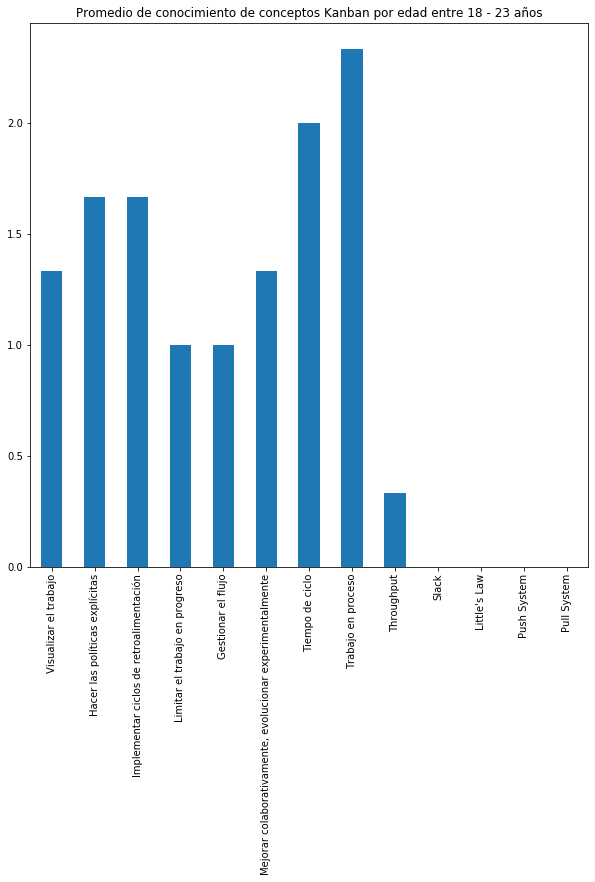

In [22]:
# Promedio de conocimiento de los conceptos de Lean Kanban por edad entre 18 - 23 años
entre_18_23.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por edad entre 18 - 23 años")

In [23]:
# Conceptos por edad entre 30 a 35 años
entre_30_35 = data_previa[data_previa["Edad"] == "30 - 35 años"]
entre_30_35.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               2.000000                         2.00000   
mean                2.500000                         1.50000   
std                 3.535534                         2.12132   
min                 0.000000                         0.00000   
25%                 1.250000                         0.75000   
50%                 2.500000                         1.50000   
75%                 3.750000                         2.25000   
max                 5.000000                         3.00000   

       Implementar ciclos de retroalimentación  \
count                                  2.00000   
mean                                   1.50000   
std                                    2.12132   
min                                    0.00000   
25%                                    0.75000   
50%                                    1.50000   
75%                                    2.25000   
max                                    3.00000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                         2.00000             2.00000   
mean                          1.50000             1.50000   
std                           2.12132             2.12132   
min                           0.00000             0.00000   
25%                           0.75000             0.75000   
50%                           1.50000             1.50000   
75%                           2.25000             2.25000   
max                           3.00000             3.00000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           2.000000          
mean                                            2.000000          
std                                             2.828427          
min                                             0.000000          
25%                                             1.000000          
50%                                             2.000000          
75%                                             3.000000          
max                                             4.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count         2.000000            2.000000    2.000000    2.0           2.0   
mean          2.000000            2.000000    2.000000    0.0           0.0   
std           2.828427            2.828427    2.828427    0.0           0.0   
min           0.000000            0.000000    0.000000    0.0           0.0   
25%           1.000000            1.000000    1.000000    0.0           0.0   
50%           2.000000            2.000000    2.000000    0.0           0.0   
75%           3.000000            3.000000    3.000000    0.0           0.0   
max           4.000000            4.000000    4.000000    0.0           0.0   

       Push System  Pull System  
count          2.0          2.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

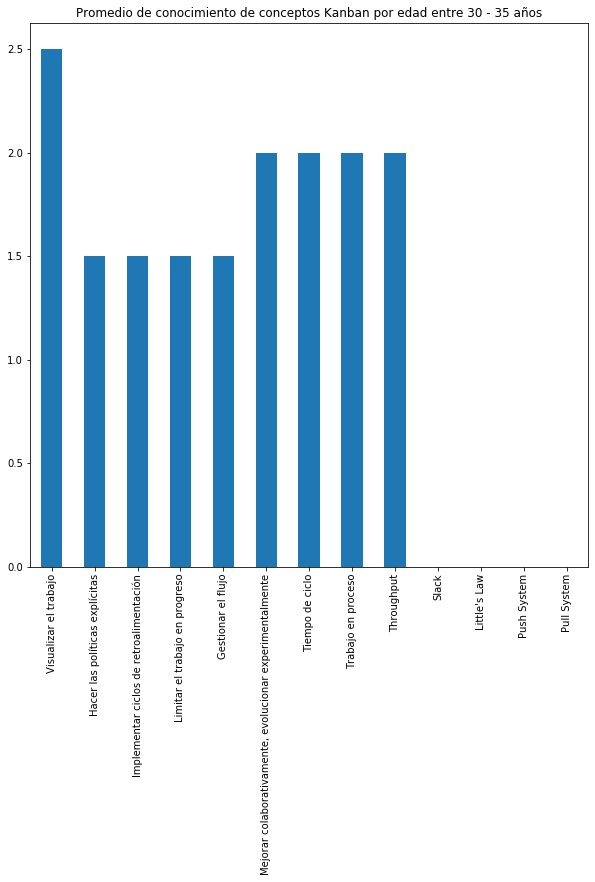

In [24]:
# Promedio de conocimiento de los conceptos de Lean Kanban por edad entre 30 - 35 años
entre_30_35.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por edad entre 30 - 35 años")

In [25]:
# Conceptos por edad de más de 35 años
mayor_35 = data_previa[data_previa["Edad"] == "Más de 35 años"]
mayor_35.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               6.000000                        6.000000   
mean                1.333333                        1.666667   
std                 3.265986                        4.082483   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000                        0.000000   
75%                 0.000000                        0.000000   
max                 8.000000                       10.000000   

       Implementar ciclos de retroalimentación  \
count                                 6.000000   
mean                                  1.833333   
std                                   4.020779   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.750000   
max                                  10.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                            6.00            6.000000   
mean                             1.00            1.333333   
std                              2.00            1.966384   
min                              0.00            0.000000   
25%                              0.00            0.000000   
50%                              0.00            0.500000   
75%                              0.75            1.750000   
max                              5.00            5.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                               6.00          
mean                                                1.00          
std                                                 2.00          
min                                                 0.00          
25%                                                 0.00          
50%                                                 0.00          
75%                                                 0.75          
max                                                 5.00          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count         6.000000            6.000000    6.000000    6.0           6.0   
mean          1.166667            1.333333    0.166667    0.0           0.0   
std           2.041241            1.966384    0.408248    0.0           0.0   
min           0.000000            0.000000    0.000000    0.0           0.0   
25%           0.000000            0.000000    0.000000    0.0           0.0   
50%           0.000000            0.500000    0.000000    0.0           0.0   
75%           1.500000            1.750000    0.000000    0.0           0.0   
max           5.000000            5.000000    1.000000    0.0           0.0   

       Push System  Pull System  
count          6.0          6.0  
mean           0.0          0.0  
std            0.0          0.0  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

In [26]:
# Promedio de conocimiento de los conceptos de Lean Kanban por edad mayor a 35 años
mayor_35.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por edad mayor a 35 años")

In [27]:
# Edades
data_previa["Edad"].value_counts()

Más de 35 años      6
18 - 23 años        3
30 - 35 años        2
Menos de 18 años    1
24 - 29 años        0
Name: Edad, dtype: int64

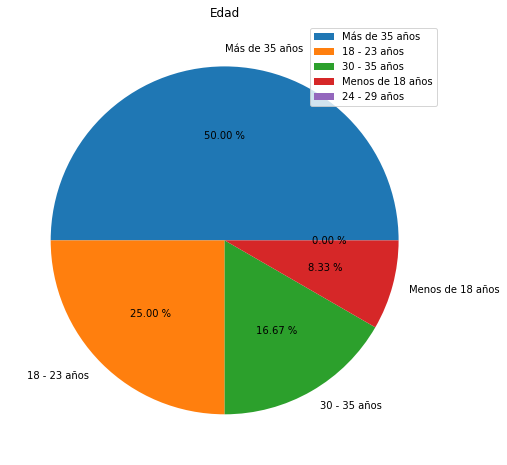

In [94]:
# Gráfica de edades
edad_plot = data_previa['Edad'].value_counts().plot(kind='pie', label = "", legend = True, title = "Edad", autopct='%.2f %%', figsize=(8, 8))

In [29]:
#Genero
data_previa["Genero"].value_counts()

Femenino     8
Masculino    4
Name: Genero, dtype: int64

In [95]:
# Gráfica de genero
genero_plot = data_previa['Genero'].value_counts().plot(kind='pie', label = "", legend = True, title = "Genero", autopct='%.2f %%', figsize=(8, 8))

In [31]:
# Último nivel de estudios de los participantes
data_previa["¿Último nivel de estudio?"].value_counts()

Licenciatura              6
Técnico                   4
Preparatoria              2
Postdoctorado             0
Doctorado                 0
Maestría                  0
Nivel básico terminado    0
Name: ¿Último nivel de estudio?, dtype: int64

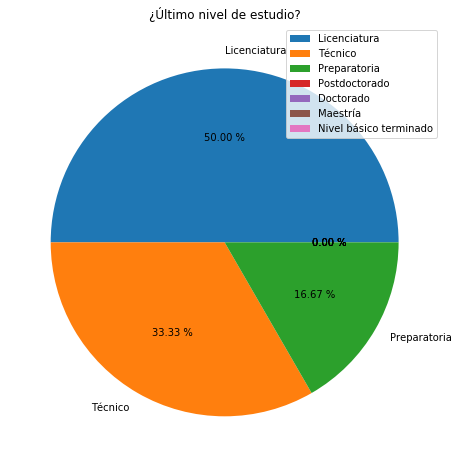

In [96]:
# Gráfica de último nivel de estudios
estudios_plot = data_previa['¿Último nivel de estudio?'].value_counts().plot(kind='pie', label = "", legend = True, title = "¿Último nivel de estudio?", autopct='%.2f %%', figsize=(8, 8))

In [33]:
# Experiencia en Kanban de los participantes
data_previa["Experiencia con kanban"].value_counts()

1    12
5     0
4     0
3     0
2     0
Name: Experiencia con kanban, dtype: int64

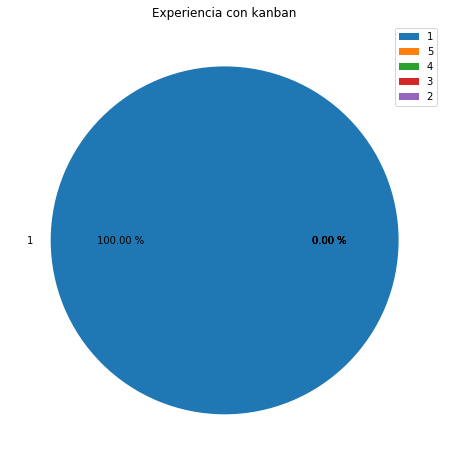

In [97]:
# Gráfica de experiencia con kanban
experiencia_plot = data_previa['Experiencia con kanban'].value_counts().plot(kind='pie', label = "", legend = True, title = "Experiencia con kanban", autopct='%.2f %%', figsize=(8, 8))

Text(0, 0.5, 'Valores')

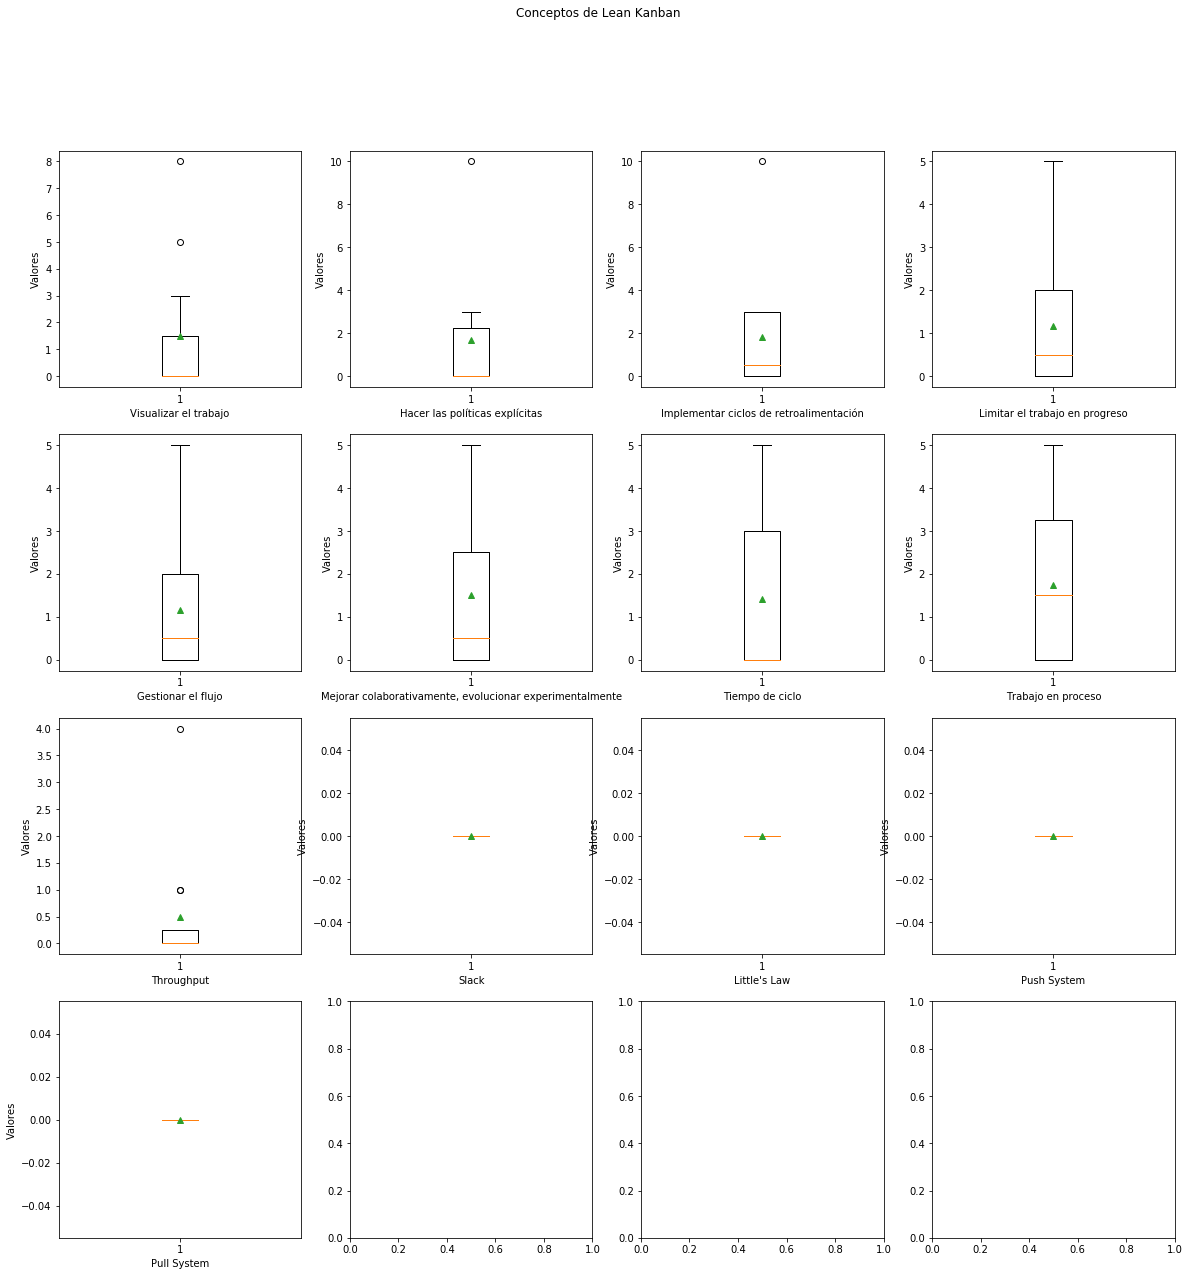

In [35]:
# Conceptos de Lean Kanban
fig, axs = plt.subplots(4, 4, figsize = [20,20])
fig.suptitle('Conceptos de Lean Kanban')
axs[0, 0].boxplot(data_previa["Visualizar el trabajo"],showmeans=True)
axs[0, 0].set_xlabel('Visualizar el trabajo')
axs[0, 0].set_ylabel('Valores')

axs[0, 1].boxplot(data_previa["Hacer las políticas explícitas"],showmeans=True)
axs[0, 1].set_xlabel('Hacer las políticas explícitas')
axs[0, 1].set_ylabel('Valores')

axs[0, 2].boxplot(data_previa["Implementar ciclos de retroalimentación"],showmeans=True)
axs[0, 2].set_xlabel('Implementar ciclos de retroalimentación')
axs[0, 2].set_ylabel('Valores')

axs[0, 3].boxplot(data_previa["Limitar el trabajo en progreso"],showmeans=True)
axs[0, 3].set_xlabel('Limitar el trabajo en progreso')
axs[0, 3].set_ylabel('Valores')

axs[1, 0].boxplot(data_previa["Gestionar el flujo"],showmeans=True)
axs[1, 0].set_xlabel('Gestionar el flujo')
axs[1, 0].set_ylabel('Valores')

axs[1, 1].boxplot(data_previa["Mejorar colaborativamente, evolucionar experimentalmente"],showmeans=True)
axs[1, 1].set_xlabel('Mejorar colaborativamente, evolucionar experimentalmente')
axs[1, 1].set_ylabel('Valores')

axs[1, 2].boxplot(data_previa["Tiempo de ciclo"],showmeans=True)
axs[1, 2].set_xlabel('Tiempo de ciclo')
axs[1, 2].set_ylabel('Valores')

axs[1, 3].boxplot(data_previa["Trabajo en proceso"],showmeans=True)
axs[1, 3].set_xlabel('Trabajo en proceso')
axs[1, 3].set_ylabel('Valores')

axs[2, 0].boxplot(data_previa["Throughput"],showmeans=True)
axs[2, 0].set_xlabel('Throughput')
axs[2, 0].set_ylabel('Valores')

axs[2, 1].boxplot(data_previa["Slack"],showmeans=True)
axs[2, 1].set_xlabel('Slack')
axs[2, 1].set_ylabel('Valores')

axs[2, 2].boxplot(data_previa["Little's Law"],showmeans=True)
axs[2, 2].set_xlabel("Little's Law")
axs[2, 2].set_ylabel('Valores')

axs[2, 3].boxplot(data_previa["Push System"],showmeans=True)
axs[2, 3].set_xlabel('Push System')
axs[2, 3].set_ylabel('Valores')

axs[3, 0].boxplot(data_previa["Pull System"],showmeans=True)
axs[3, 0].set_xlabel('Pull System')
axs[3, 0].set_ylabel('Valores')

In [36]:
# Datos estadísticos de la encuesta posterior
data_posterior.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count              12.000000                       12.000000   
mean                6.333333                        6.500000   
std                 1.969464                        1.834022   
min                 3.000000                        4.000000   
25%                 4.750000                        5.000000   
50%                 7.500000                        7.000000   
75%                 8.000000                        8.000000   
max                 8.000000                        9.000000   

       Implementar ciclos de retroalimentación  \
count                                12.000000   
mean                                  7.250000   
std                                   1.712255   
min                                   5.000000   
25%                                   6.000000   
50%                                   7.000000   
75%                                   9.000000   
max                                  10.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                       12.000000           12.000000   
mean                         7.333333            6.916667   
std                          1.614330            1.564279   
min                          5.000000            4.000000   
25%                          5.750000            5.750000   
50%                          8.000000            7.500000   
75%                          8.250000            8.000000   
max                          9.000000            9.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                          12.000000          
mean                                            6.750000          
std                                             1.422226          
min                                             4.000000          
25%                                             5.750000          
50%                                             7.000000          
75%                                             8.000000          
max                                             8.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput      Slack  \
count        12.000000           12.000000   12.000000  12.000000   
mean          6.583333            7.250000    4.833333   3.333333   
std           1.505042            1.544786    2.480225   2.461830   
min           5.000000            5.000000    0.000000   0.000000   
25%           5.000000            6.500000    3.750000   1.000000   
50%           7.000000            7.500000    5.000000   3.500000   
75%           8.000000            8.250000    6.000000   5.000000   
max           8.000000            9.000000    9.000000   7.000000   

       Little's Law  Push System  Pull System  
count      12.00000    12.000000    12.000000  
mean        4.00000     6.583333     6.666667  
std         2.44949     2.234373     2.348436  
min         0.00000     3.000000     3.000000  
25%         2.50000     4.750000     4.750000  
50%         4.50000     7.500000     7.500000  
75%         5.50000     8.000000     8.000000  
max         7.00000     9.000000    10.000000

In [37]:
# Promedio de conocimiento de los conceptos de Lean Kanban de encuesta posterior
data_posterior.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban (Encuesta posterior)")

In [38]:
# Añadimos las columnas faltantes del genero, edad, nivel de estudio de la primera encuesta a la encuesta posterior para
# hacer comparaciones

data_posterior["Edad"] = data_previa["Edad"]
data_posterior["Genero"] = data_previa["Genero"]
data_posterior["¿Último nivel de estudio?"] = data_previa["¿Último nivel de estudio?"]

In [39]:
# Conceptos por genero femenino de encuesta posterior
femenino_post = data_posterior[data_posterior["Genero"] == "Femenino"]
femenino_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count                8.00000                        8.000000   
mean                 6.50000                        7.375000   
std                  2.13809                        1.505941   
min                  3.00000                        5.000000   
25%                  4.75000                        7.250000   
50%                  8.00000                        8.000000   
75%                  8.00000                        8.000000   
max                  8.00000                        9.000000   

       Implementar ciclos de retroalimentación  \
count                                 8.000000   
mean                                  8.000000   
std                                   1.511858   
min                                   6.000000   
25%                                   6.750000   
50%                                   8.500000   
75%                                   9.000000   
max                                  10.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        8.000000            8.000000   
mean                         7.625000            7.125000   
std                          1.407886            1.726888   
min                          5.000000            4.000000   
25%                          7.500000            6.500000   
50%                          8.000000            8.000000   
75%                          8.250000            8.000000   
max                          9.000000            9.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           8.000000          
mean                                            7.125000          
std                                             1.356203          
min                                             5.000000          
25%                                             6.500000          
50%                                             8.000000          
75%                                             8.000000          
max                                             8.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput     Slack  \
count         8.000000            8.000000    8.000000  8.000000   
mean          6.875000            7.875000    5.000000  4.125000   
std           1.552648            1.356203    2.976095  2.356602   
min           5.000000            5.000000    0.000000  1.000000   
25%           5.000000            7.750000    3.500000  2.500000   
50%           8.000000            8.000000    5.500000  4.500000   
75%           8.000000            9.000000    6.500000  5.500000   
max           8.000000            9.000000    9.000000  7.000000   

       Little's Law  Push System  Pull System  
count       8.00000     8.000000     8.000000  
mean        4.50000     7.500000     7.625000  
std         2.56348     1.927248     2.065879  
min         1.00000     3.000000     3.000000  
25%         2.50000     7.750000     7.750000  
50%         5.00000     8.000000     8.000000  
75%         7.00000     8.250000     8.250000  
max         7.00000     9.000000    10.000000

In [40]:
# Promedio de conocimiento de los conceptos de Lean Kanban por genero femenino encuesta posterior
femenino_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por genero femenino (Encuesta posterior)")

In [41]:
# Conceptos por genero masculino de encuesta posterior
masculino_post = data_posterior[data_posterior["Genero"] == "Masculino"]
masculino_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               4.000000                        4.000000   
mean                6.000000                        4.750000   
std                 1.825742                        0.957427   
min                 4.000000                        4.000000   
25%                 4.750000                        4.000000   
50%                 6.000000                        4.500000   
75%                 7.250000                        5.250000   
max                 8.000000                        6.000000   

       Implementar ciclos de retroalimentación  \
count                                 4.000000   
mean                                  5.750000   
std                                   0.957427   
min                                   5.000000   
25%                                   5.000000   
50%                                   5.500000   
75%                                   6.250000   
max                                   7.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        4.000000            4.000000   
mean                         6.750000            6.500000   
std                          2.061553            1.290994   
min                          5.000000            5.000000   
25%                          5.000000            5.750000   
50%                          6.500000            6.500000   
75%                          8.250000            7.250000   
max                          9.000000            8.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           4.000000          
mean                                            6.000000          
std                                             1.414214          
min                                             4.000000          
25%                                             5.500000          
50%                                             6.500000          
75%                                             7.000000          
max                                             7.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput     Slack  \
count         4.000000            4.000000    4.000000  4.000000   
mean          6.000000            6.000000    4.500000  1.750000   
std           1.414214            1.154701    1.290994  2.061553   
min           5.000000            5.000000    3.000000  0.000000   
25%           5.000000            5.000000    3.750000  0.000000   
50%           5.500000            6.000000    4.500000  1.500000   
75%           6.500000            7.000000    5.250000  3.250000   
max           8.000000            7.000000    6.000000  4.000000   

       Little's Law  Push System  Pull System  
count      4.000000     4.000000     4.000000  
mean       3.000000     4.750000     4.750000  
std        2.160247     1.707825     1.707825  
min        0.000000     3.000000     3.000000  
25%        2.250000     3.750000     3.750000  
50%        3.500000     4.500000     4.500000  
75%        4.250000     5.500000     5.500000  
max        5.000000     7.000000     7.000000

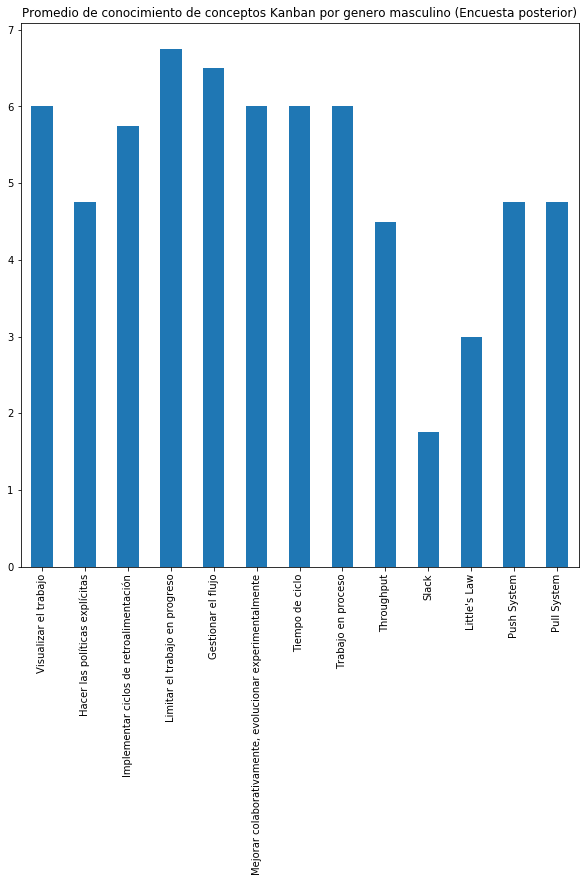

In [42]:
# Promedio de conocimiento de los conceptos de Lean Kanban por genero masculino encuesta posterior
masculino_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por genero masculino (Encuesta posterior)")

In [43]:
# Conceptos por nivel de estudios Preparatoria encuesta posterior
preparatoria_post = data_posterior[data_posterior["¿Último nivel de estudio?"] == "Preparatoria"]
preparatoria_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count                    2.0                        2.000000   
mean                     4.0                        4.500000   
std                      0.0                        0.707107   
min                      4.0                        4.000000   
25%                      4.0                        4.250000   
50%                      4.0                        4.500000   
75%                      4.0                        4.750000   
max                      4.0                        5.000000   

       Implementar ciclos de retroalimentación  \
count                                 2.000000   
mean                                  5.500000   
std                                   0.707107   
min                                   5.000000   
25%                                   5.250000   
50%                                   5.500000   
75%                                   5.750000   
max                                   6.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                         2.00000             2.00000   
mean                          6.50000             6.50000   
std                           2.12132             2.12132   
min                           5.00000             5.00000   
25%                           5.75000             5.75000   
50%                           6.50000             6.50000   
75%                           7.25000             7.25000   
max                           8.00000             8.00000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           2.000000          
mean                                            6.000000          
std                                             2.828427          
min                                             4.000000          
25%                                             5.000000          
50%                                             6.000000          
75%                                             7.000000          
max                                             8.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput     Slack  \
count              2.0             2.00000         2.0  2.000000   
mean               5.0             6.50000         4.0  3.500000   
std                0.0             2.12132         0.0  0.707107   
min                5.0             5.00000         4.0  3.000000   
25%                5.0             5.75000         4.0  3.250000   
50%                5.0             6.50000         4.0  3.500000   
75%                5.0             7.25000         4.0  3.750000   
max                5.0             8.00000         4.0  4.000000   

       Little's Law  Push System  Pull System  
count      2.000000     2.000000     2.000000  
mean       5.000000     6.000000     6.500000  
std        2.828427     4.242641     4.949747  
min        3.000000     3.000000     3.000000  
25%        4.000000     4.500000     4.750000  
50%        5.000000     6.000000     6.500000  
75%        6.000000     7.500000     8.250000  
max        7.000000     9.000000    10.000000

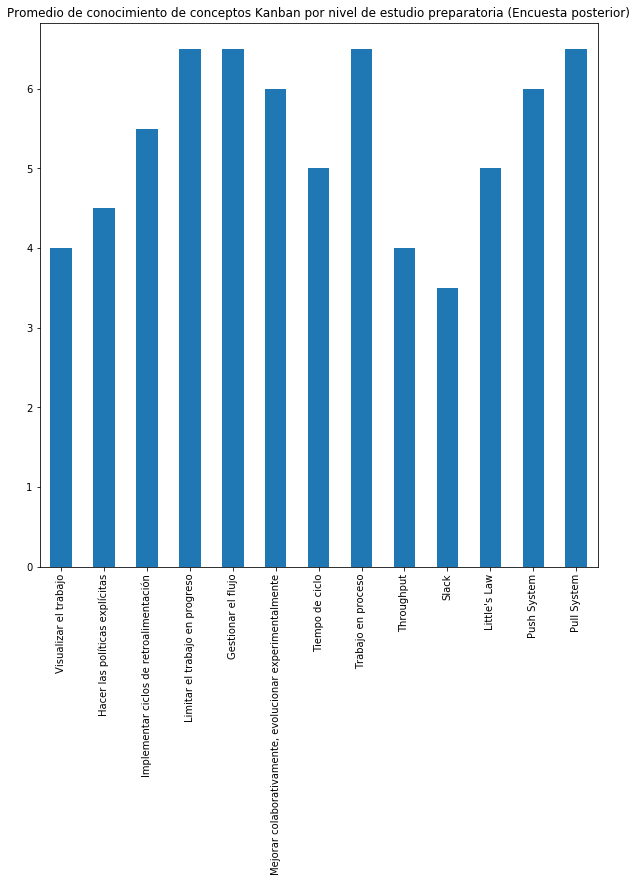

In [44]:
# Promedio de conocimiento de los conceptos de Lean Kanban nivel de estudio preparatoria encuesta posterior
preparatoria_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por nivel de estudio preparatoria (Encuesta posterior)")

In [45]:
# Conceptos por nivel de estudios Licenciatura encuesta posterior
licenciatura_post = data_posterior[data_posterior["¿Último nivel de estudio?"] == "Licenciatura"]
licenciatura_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               6.000000                        6.000000   
mean                7.000000                        7.166667   
std                 1.549193                        1.329160   
min                 5.000000                        5.000000   
25%                 5.750000                        6.500000   
50%                 8.000000                        8.000000   
75%                 8.000000                        8.000000   
max                 8.000000                        8.000000   

       Implementar ciclos de retroalimentación  \
count                                 6.000000   
mean                                  7.666667   
std                                   1.751190   
min                                   5.000000   
25%                                   7.000000   
50%                                   7.500000   
75%                                   8.750000   
max                                  10.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        6.000000            6.000000   
mean                         7.333333            6.500000   
std                          1.505545            1.760682   
min                          5.000000            4.000000   
25%                          6.500000            5.250000   
50%                          8.000000            7.000000   
75%                          8.000000            8.000000   
max                          9.000000            8.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           6.000000          
mean                                            6.500000          
std                                             1.378405          
min                                             5.000000          
25%                                             5.250000          
50%                                             6.500000          
75%                                             7.750000          
max                                             8.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput     Slack  \
count         6.000000             6.00000    6.000000  6.000000   
mean          6.666667             7.00000    5.000000  4.666667   
std           1.505545             1.67332    2.683282  2.581989   
min           5.000000             5.00000    0.000000  0.000000   
25%           5.250000             5.50000    5.000000  4.250000   
50%           7.000000             7.50000    5.500000  5.000000   
75%           8.000000             8.00000    6.000000  6.500000   
max           8.000000             9.00000    8.000000  7.000000   

       Little's Law  Push System  Pull System  
count      6.000000     6.000000     6.000000  
mean       4.833333     7.333333     7.333333  
std        2.562551     1.366260     1.366260  
min        0.000000     5.000000     5.000000  
25%        5.000000     7.000000     7.000000  
50%        5.000000     7.500000     7.500000  
75%        6.500000     8.000000     8.000000  
max        7.000000     9.000000     9.000000

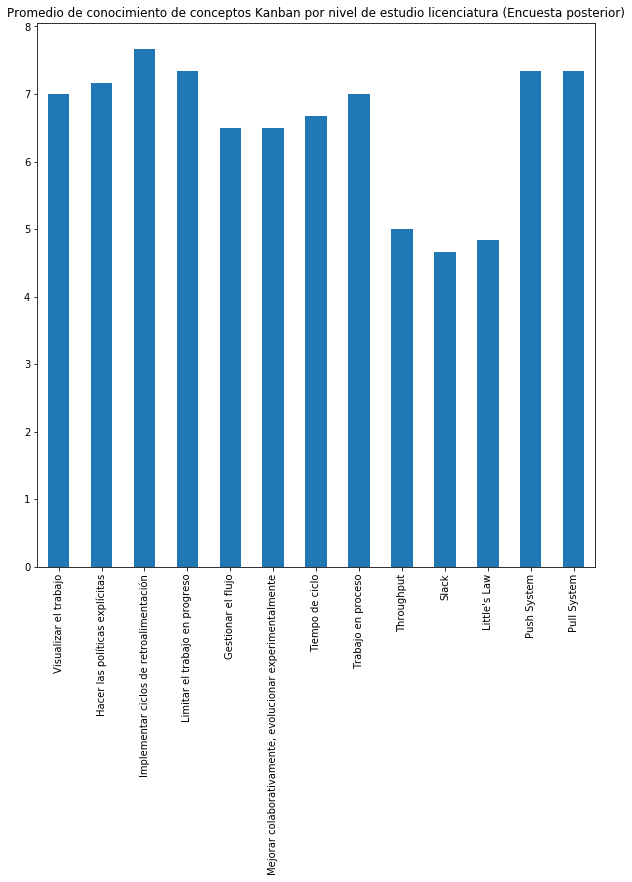

In [46]:
# Promedio de conocimiento de los conceptos de Lean Kanban nivel de estudio licenciatura encuesta posterior
licenciatura_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por nivel de estudio licenciatura (Encuesta posterior)")

In [47]:
# Conceptos por nivel de estudios técnico encuesta posterior
tecnico_post = data_posterior[data_posterior["¿Último nivel de estudio?"] == "Técnico"]
tecnico_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               4.000000                        4.000000   
mean                6.500000                        6.500000   
std                 2.380476                        2.380476   
min                 3.000000                        4.000000   
25%                 6.000000                        4.750000   
50%                 7.500000                        6.500000   
75%                 8.000000                        8.250000   
max                 8.000000                        9.000000   

       Implementar ciclos de retroalimentación  \
count                                 4.000000   
mean                                  7.500000   
std                                   1.732051   
min                                   6.000000   
25%                                   6.000000   
50%                                   7.500000   
75%                                   9.000000   
max                                   9.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        4.000000            4.000000   
mean                         7.750000            7.750000   
std                          1.892969            0.957427   
min                          5.000000            7.000000   
25%                          7.250000            7.000000   
50%                          8.500000            7.500000   
75%                          9.000000            8.250000   
max                          9.000000            9.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                            4.00000          
mean                                             7.50000          
std                                              0.57735          
min                                              7.00000          
25%                                              7.00000          
50%                                              7.50000          
75%                                              8.00000          
max                                              8.00000          

       Tiempo de ciclo  Trabajo en proceso  Throughput     Slack  \
count             4.00            4.000000    4.000000  4.000000   
mean              7.25            8.000000    5.000000  1.250000   
std               1.50            1.154701    3.162278  1.258306   
min               5.00            7.000000    2.000000  0.000000   
25%               7.25            7.000000    2.750000  0.750000   
50%               8.00            8.000000    4.500000  1.000000   
75%               8.00            9.000000    6.750000  1.500000   
max               8.00            9.000000    9.000000  3.000000   

       Little's Law  Push System  Pull System  
count          4.00     4.000000     4.000000  
mean           2.25     5.750000     5.750000  
std            1.50     2.629956     2.629956  
min            1.00     3.000000     3.000000  
25%            1.00     3.750000     3.750000  
50%            2.00     6.000000     6.000000  
75%            3.25     8.000000     8.000000  
max            4.00     8.000000     8.000000

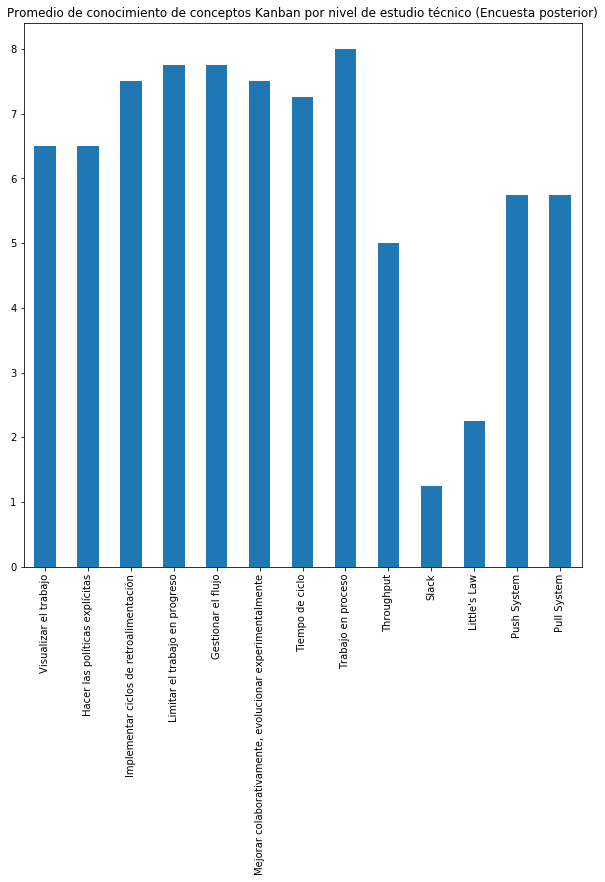

In [48]:
# Promedio de conocimiento de los conceptos de Lean Kanban nivel de estudio técnico encuesta posterior
tecnico_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por nivel de estudio técnico (Encuesta posterior)")

In [49]:
# Conceptos por edad menor de 18 encuesta posterior
menor_18_post = data_posterior[data_posterior["Edad"] == "Menos de 18 años"]
menor_18_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count                    1.0                             1.0   
mean                     4.0                             5.0   
std                      NaN                             NaN   
min                      4.0                             5.0   
25%                      4.0                             5.0   
50%                      4.0                             5.0   
75%                      4.0                             5.0   
max                      4.0                             5.0   

       Implementar ciclos de retroalimentación  \
count                                      1.0   
mean                                       6.0   
std                                        NaN   
min                                        6.0   
25%                                        6.0   
50%                                        6.0   
75%                                        6.0   
max                                        6.0   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                             1.0                 1.0   
mean                              8.0                 8.0   
std                               NaN                 NaN   
min                               8.0                 8.0   
25%                               8.0                 8.0   
50%                               8.0                 8.0   
75%                               8.0                 8.0   
max                               8.0                 8.0   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                                1.0          
mean                                                 8.0          
std                                                  NaN          
min                                                  8.0          
25%                                                  8.0          
50%                                                  8.0          
75%                                                  8.0          
max                                                  8.0          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count              1.0                 1.0         1.0    1.0           1.0   
mean               5.0                 8.0         4.0    4.0           7.0   
std                NaN                 NaN         NaN    NaN           NaN   
min                5.0                 8.0         4.0    4.0           7.0   
25%                5.0                 8.0         4.0    4.0           7.0   
50%                5.0                 8.0         4.0    4.0           7.0   
75%                5.0                 8.0         4.0    4.0           7.0   
max                5.0                 8.0         4.0    4.0           7.0   

       Push System  Pull System  
count          1.0          1.0  
mean           9.0         10.0  
std            NaN          NaN  
min            9.0         10.0  
25%            9.0         10.0  
50%            9.0         10.0  
75%            9.0         10.0  
max            9.0         10.0

In [50]:
# Promedio de conocimiento de los conceptos de Lean Kanban por edad menor a 18 encuesta posterior
menor_18_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por edad menor a 18 años (Encuesta posterior)")

In [51]:
# Conceptos por edad entre 18 - 23 años encuesta posterior
entre_18_23_post = data_posterior[data_posterior["Edad"] == "18 - 23 años"]
entre_18_23_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               3.000000                        3.000000   
mean                4.666667                        4.333333   
std                 2.081666                        0.577350   
min                 3.000000                        4.000000   
25%                 3.500000                        4.000000   
50%                 4.000000                        4.000000   
75%                 5.500000                        4.500000   
max                 7.000000                        5.000000   

       Implementar ciclos de retroalimentación  \
count                                 3.000000   
mean                                  5.666667   
std                                   0.577350   
min                                   5.000000   
25%                                   5.500000   
50%                                   6.000000   
75%                                   6.000000   
max                                   6.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        3.000000            3.000000   
mean                         6.000000            6.333333   
std                          1.732051            1.154701   
min                          5.000000            5.000000   
25%                          5.000000            6.000000   
50%                          5.000000            7.000000   
75%                          6.500000            7.000000   
max                          8.000000            7.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           3.000000          
mean                                            6.000000          
std                                             1.732051          
min                                             4.000000          
25%                                             5.500000          
50%                                             7.000000          
75%                                             7.000000          
max                                             7.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput     Slack  \
count         3.000000            3.000000    3.000000  3.000000   
mean          6.000000            6.333333    4.333333  2.000000   
std           1.732051            1.154701    1.527525  1.732051   
min           5.000000            5.000000    3.000000  0.000000   
25%           5.000000            6.000000    3.500000  1.500000   
50%           5.000000            7.000000    4.000000  3.000000   
75%           6.500000            7.000000    5.000000  3.000000   
max           8.000000            7.000000    6.000000  3.000000   

       Little's Law  Push System  Pull System  
count      3.000000     3.000000     3.000000  
mean       3.333333     3.333333     3.333333  
std        0.577350     0.577350     0.577350  
min        3.000000     3.000000     3.000000  
25%        3.000000     3.000000     3.000000  
50%        3.000000     3.000000     3.000000  
75%        3.500000     3.500000     3.500000  
max        4.000000     4.000000     4.000000

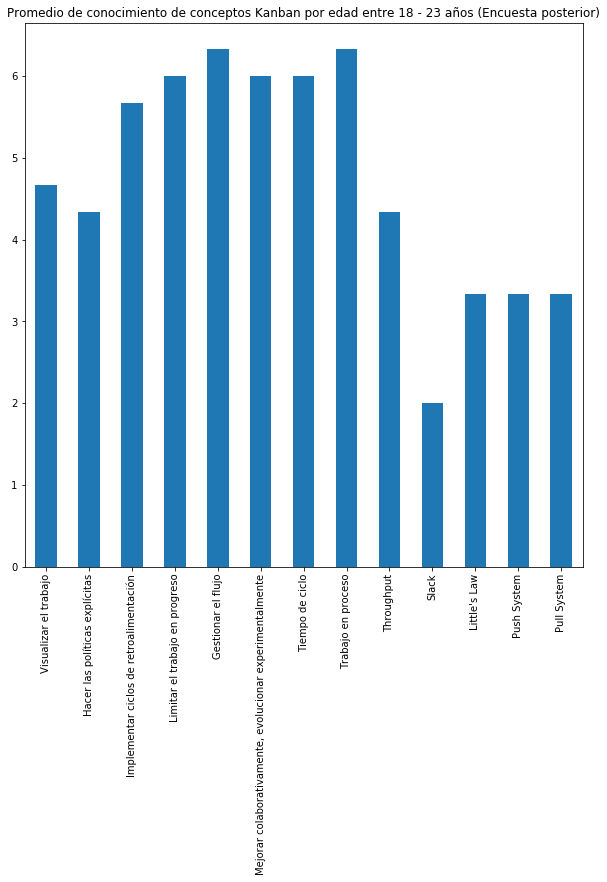

In [52]:
# Promedio de conocimiento de los conceptos de Lean Kanban por edad entre 18 - 23 años encuesta posterior
entre_18_23_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por edad entre 18 - 23 años (Encuesta posterior)")

In [53]:
# Conceptos por edad entre 30 a 35 años encuesta posterior
entre_30_35_post = data_posterior[data_posterior["Edad"] == "30 - 35 años"]
entre_30_35_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count                    2.0                        2.000000   
mean                     8.0                        8.500000   
std                      0.0                        0.707107   
min                      8.0                        8.000000   
25%                      8.0                        8.250000   
50%                      8.0                        8.500000   
75%                      8.0                        8.750000   
max                      8.0                        9.000000   

       Implementar ciclos de retroalimentación  \
count                                      2.0   
mean                                       9.0   
std                                        0.0   
min                                        9.0   
25%                                        9.0   
50%                                        9.0   
75%                                        9.0   
max                                        9.0   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                             2.0            2.000000   
mean                              9.0            8.500000   
std                               0.0            0.707107   
min                               9.0            8.000000   
25%                               9.0            8.250000   
50%                               9.0            8.500000   
75%                               9.0            8.750000   
max                               9.0            9.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                                2.0          
mean                                                 8.0          
std                                                  0.0          
min                                                  8.0          
25%                                                  8.0          
50%                                                  8.0          
75%                                                  8.0          
max                                                  8.0          

       Tiempo de ciclo  Trabajo en proceso  Throughput  Slack  Little's Law  \
count              2.0                 2.0    2.000000    2.0           2.0   
mean               8.0                 9.0    5.500000    1.0           1.0   
std                0.0                 0.0    4.949747    0.0           0.0   
min                8.0                 9.0    2.000000    1.0           1.0   
25%                8.0                 9.0    3.750000    1.0           1.0   
50%                8.0                 9.0    5.500000    1.0           1.0   
75%                8.0                 9.0    7.250000    1.0           1.0   
max                8.0                 9.0    9.000000    1.0           1.0   

       Push System  Pull System  
count          2.0          2.0  
mean           8.0          8.0  
std            0.0          0.0  
min            8.0          8.0  
25%            8.0          8.0  
50%            8.0          8.0  
75%            8.0          8.0  
max            8.0          8.0

In [54]:
# Promedio de conocimiento de los conceptos de Lean Kanban por edad entre 30 - 35 años encuesta posterior
entre_30_35_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por edad entre 30 - 35 años (Encuesta posterior)")

In [55]:
# Conceptos por edad de más de 35 años encuesta posterior
mayor_35_post = data_posterior[data_posterior["Edad"] == "Más de 35 años"]
mayor_35_post.describe()

Visualizar el trabajo  Hacer las políticas explícitas  \
count               6.000000                        6.000000   
mean                7.000000                        7.166667   
std                 1.549193                        1.329160   
min                 5.000000                        5.000000   
25%                 5.750000                        6.500000   
50%                 8.000000                        8.000000   
75%                 8.000000                        8.000000   
max                 8.000000                        8.000000   

       Implementar ciclos de retroalimentación  \
count                                 6.000000   
mean                                  7.666667   
std                                   1.751190   
min                                   5.000000   
25%                                   7.000000   
50%                                   7.500000   
75%                                   8.750000   
max                                  10.000000   

       Limitar el trabajo en progreso  Gestionar el flujo  \
count                        6.000000            6.000000   
mean                         7.333333            6.500000   
std                          1.505545            1.760682   
min                          5.000000            4.000000   
25%                          6.500000            5.250000   
50%                          8.000000            7.000000   
75%                          8.000000            8.000000   
max                          9.000000            8.000000   

       Mejorar colaborativamente, evolucionar experimentalmente  \
count                                           6.000000          
mean                                            6.500000          
std                                             1.378405          
min                                             5.000000          
25%                                             5.250000          
50%                                             6.500000          
75%                                             7.750000          
max                                             8.000000          

       Tiempo de ciclo  Trabajo en proceso  Throughput     Slack  \
count         6.000000             6.00000    6.000000  6.000000   
mean          6.666667             7.00000    5.000000  4.666667   
std           1.505545             1.67332    2.683282  2.581989   
min           5.000000             5.00000    0.000000  0.000000   
25%           5.250000             5.50000    5.000000  4.250000   
50%           7.000000             7.50000    5.500000  5.000000   
75%           8.000000             8.00000    6.000000  6.500000   
max           8.000000             9.00000    8.000000  7.000000   

       Little's Law  Push System  Pull System  
count      6.000000     6.000000     6.000000  
mean       4.833333     7.333333     7.333333  
std        2.562551     1.366260     1.366260  
min        0.000000     5.000000     5.000000  
25%        5.000000     7.000000     7.000000  
50%        5.000000     7.500000     7.500000  
75%        6.500000     8.000000     8.000000  
max        7.000000     9.000000     9.000000

In [56]:
# Promedio de conocimiento de los conceptos de Lean Kanban por edad mayor a 35 años encuesta posterior
mayor_35_post.mean().plot(kind = "bar", figsize = (10, 10), title = "Promedio de conocimiento de conceptos Kanban por edad mayor a 35 años (Encuesta posterior)")

In [57]:
# Conceptos de Lean Kanban
fig, axs = plt.subplots(4, 4, figsize = [20,20])
fig.suptitle('Conceptos de Lean Kanban (Encuesta posterior)')
axs[0, 0].boxplot(data_posterior["Visualizar el trabajo"],showmeans=True)
axs[0, 0].set_xlabel('Visualizar el trabajo')
axs[0, 0].set_ylabel('Valores')

axs[0, 1].boxplot(data_posterior["Hacer las políticas explícitas"],showmeans=True)
axs[0, 1].set_xlabel('Hacer las políticas explícitas')
axs[0, 1].set_ylabel('Valores')

axs[0, 2].boxplot(data_posterior["Implementar ciclos de retroalimentación"],showmeans=True)
axs[0, 2].set_xlabel('Implementar ciclos de retroalimentación')
axs[0, 2].set_ylabel('Valores')

axs[0, 3].boxplot(data_posterior["Limitar el trabajo en progreso"],showmeans=True)
axs[0, 3].set_xlabel('Limitar el trabajo en progreso')
axs[0, 3].set_ylabel('Valores')

axs[1, 0].boxplot(data_posterior["Gestionar el flujo"],showmeans=True)
axs[1, 0].set_xlabel('Gestionar el flujo')
axs[1, 0].set_ylabel('Valores')

axs[1, 1].boxplot(data_posterior["Mejorar colaborativamente, evolucionar experimentalmente"],showmeans=True)
axs[1, 1].set_xlabel('Mejorar colaborativamente, evolucionar experimentalmente')
axs[1, 1].set_ylabel('Valores')

axs[1, 2].boxplot(data_posterior["Tiempo de ciclo"],showmeans=True)
axs[1, 2].set_xlabel('Tiempo de ciclo')
axs[1, 2].set_ylabel('Valores')

axs[1, 3].boxplot(data_posterior["Trabajo en proceso"],showmeans=True)
axs[1, 3].set_xlabel('Trabajo en proceso')
axs[1, 3].set_ylabel('Valores')

axs[2, 0].boxplot(data_posterior["Throughput"],showmeans=True)
axs[2, 0].set_xlabel('Throughput')
axs[2, 0].set_ylabel('Valores')

axs[2, 1].boxplot(data_posterior["Slack"],showmeans=True)
axs[2, 1].set_xlabel('Slack')
axs[2, 1].set_ylabel('Valores')

axs[2, 2].boxplot(data_posterior["Little's Law"],showmeans=True)
axs[2, 2].set_xlabel("Little's Law")
axs[2, 2].set_ylabel('Valores')

axs[2, 3].boxplot(data_posterior["Push System"],showmeans=True)
axs[2, 3].set_xlabel('Push System')
axs[2, 3].set_ylabel('Valores')

axs[3, 0].boxplot(data_posterior["Pull System"],showmeans=True)
axs[3, 0].set_xlabel('Pull System')
axs[3, 0].set_ylabel('Valores')

Text(0, 0.5, 'Valores')

In [58]:
data_posterior['Cuando participé en la actividad de los barcos de papel'].value_counts()

Me divertí y aprendí          11
No me divertí pero aprendí     1
No me divertí y no aprendí     0
Me divertí pero no aprendí     0
Name: Cuando participé en la actividad de los barcos de papel, dtype: int64

In [98]:
# Gráfica de preguntas de satisfacción
satisfaccion_plot = data_posterior['Cuando participé en la actividad de los barcos de papel'].value_counts().plot(kind='pie', label = "", legend = True, title = "Cuando participé en la actividad de los barcos de papel", autopct='%.2f %%', figsize=(8, 8))

In [60]:
data_posterior['Cuando jugué Featureban'].value_counts()

Me divertí y aprendí          12
No me divertí y no aprendí     0
No me divertí pero aprendí     0
Me divertí pero no aprendí     0
Name: Cuando jugué Featureban, dtype: int64

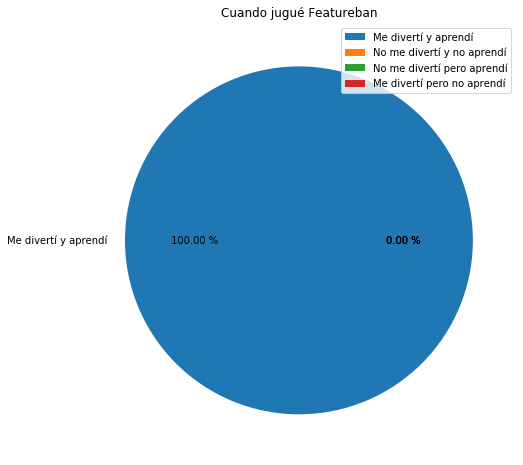

In [99]:
satisfaccion_plot = data_posterior['Cuando jugué Featureban'].value_counts().plot(kind='pie', label = "", legend = True, title = "Cuando jugué Featureban", autopct='%.2f %%', figsize=(8, 8))

In [62]:
data_posterior['Jugar juegos me ayuda a reforzar lo que aprendí con lecturas o lecciones de un instructor'].value_counts()

Me ayuda mucho      10
Me ayuda             1
Me ayuda un poco     1
No me ayuda          0
Name: Jugar juegos me ayuda a reforzar lo que aprendí con lecturas o lecciones de un instructor, dtype: int64

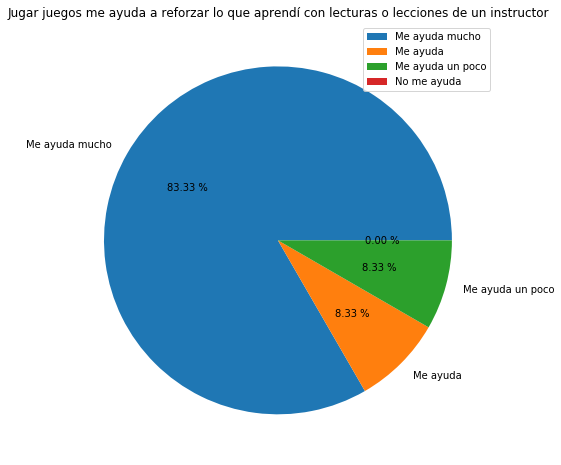

In [100]:
satisfaccion_plot = data_posterior['Jugar juegos me ayuda a reforzar lo que aprendí con lecturas o lecciones de un instructor'].value_counts().plot(kind='pie', label = "", legend = True, title = "Jugar juegos me ayuda a reforzar lo que aprendí con lecturas o lecciones de un instructor", autopct='%.2f %%', figsize=(8, 8))

In [64]:
data_posterior['Jugar juegos me motiva para aprender acerca de un tema'].value_counts()

Me motiva mucho      12
Me motiva             0
Me motiva un poco     0
No me motiva          0
Name: Jugar juegos me motiva para aprender acerca de un tema, dtype: int64

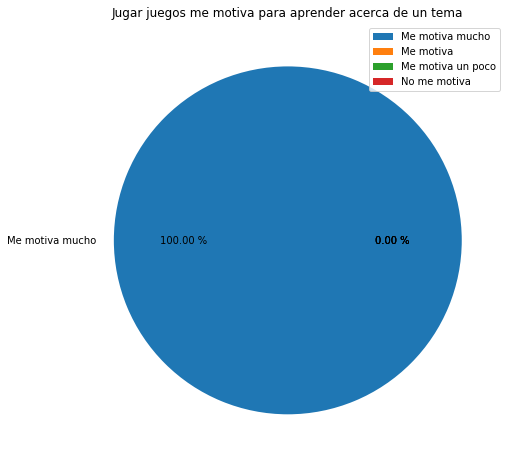

In [101]:
satisfaccion_plot = data_posterior['Jugar juegos me motiva para aprender acerca de un tema'].value_counts().plot(kind='pie', label = "", legend = True, title = "Jugar juegos me motiva para aprender acerca de un tema", autopct='%.2f %%', figsize=(8, 8))

In [66]:
data_posterior['Prefiero jugar juegos para aprender un tema'].value_counts()

A la mitad del taller    7
Al inicio del taller     5
Al final del taller      0
Name: Prefiero jugar juegos para aprender un tema, dtype: int64

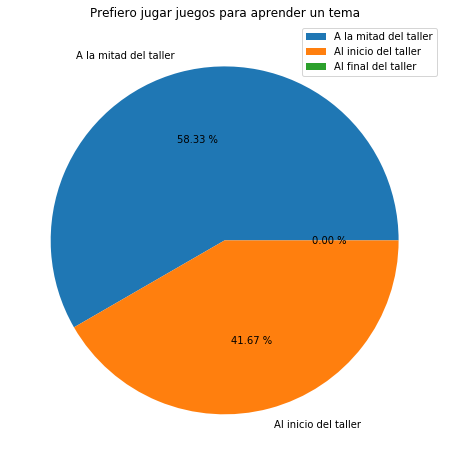

In [102]:
satisfaccion_plot = data_posterior['Prefiero jugar juegos para aprender un tema'].value_counts().plot(kind='pie', autopct='%.2f %%', legend = True, label = "", title = "Prefiero jugar juegos para aprender un tema", figsize=(8, 8))

In [68]:
data_posterior['Este elemento de la práctica de los barcos de papel me ayudó a conocer los conceptos de Kanban'].value_counts()

Todos los elementos                           4
La diferencia entre enfoques de producción    3
La simulación de una línea de producción      3
La explicación del instructor                 2
Las reglas de la práctica                     0
Ningún elemento                               0
Name: Este elemento de la práctica de los barcos de papel me ayudó a conocer los conceptos de Kanban, dtype: int64

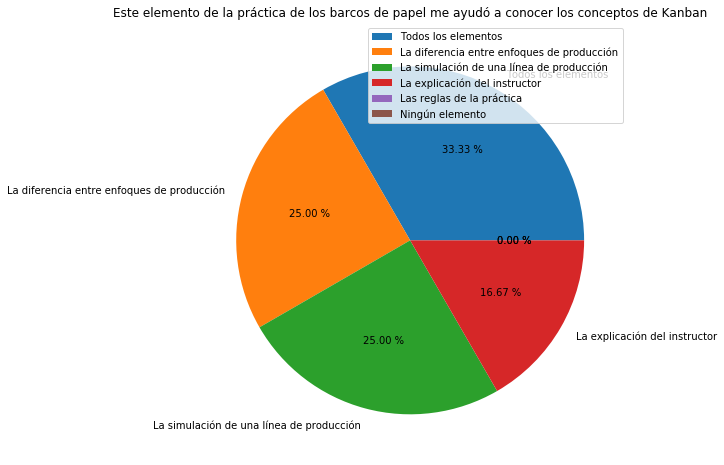

In [103]:
satisfaccion_plot = data_posterior['Este elemento de la práctica de los barcos de papel me ayudó a conocer los conceptos de Kanban'].value_counts().plot(kind='pie', autopct='%.2f %%', label = "", legend = True, title = "Este elemento de la práctica de los barcos de papel me ayudó a conocer los conceptos de Kanban", figsize=(8, 8))

In [70]:
data_posterior['Este elemento del juego de Featureban me ayudó a conocer mejor los conceptos de Kanban'].value_counts()

Todos los elementos     8
El tablero del juego    2
Los post its            1
Las reglas del juego    1
Ningún elemento         0
Name: Este elemento del juego de Featureban me ayudó a conocer mejor los conceptos de Kanban, dtype: int64

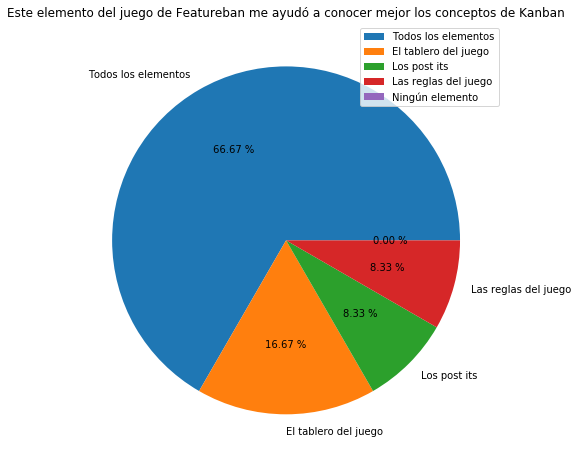

In [104]:
satisfaccion_plot = data_posterior['Este elemento del juego de Featureban me ayudó a conocer mejor los conceptos de Kanban'].value_counts().plot(kind='pie', autopct='%.2f %%', label = "", legend = True, title = "Este elemento del juego de Featureban me ayudó a conocer mejor los conceptos de Kanban", figsize=(8, 8))

In [72]:
data_posterior['El tiempo de la práctica de los barcos de papel me pareció'].value_counts()

No sentí el pasar del tiempo    10
Regular                          2
Exhaustivo                       0
Largo                            0
Corto                            0
Name: El tiempo de la práctica de los barcos de papel me pareció, dtype: int64

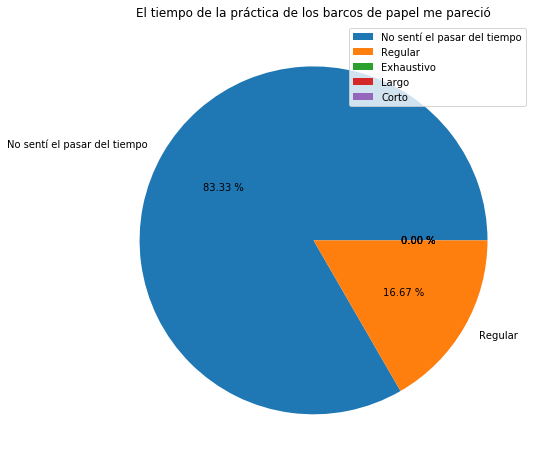

In [105]:
satisfaccion_plot = data_posterior['El tiempo de la práctica de los barcos de papel me pareció'].value_counts().plot(kind='pie', autopct='%.2f %%', legend = True, label = "", title = "El tiempo de la práctica de los barcos de papel me pareció", figsize=(8, 8))

In [74]:
data_posterior['El tiempo de juego de Featureban me pareció'].value_counts()

No sentí el pasar del tiempo    11
Regular                          1
Exhaustivo                       0
Largo                            0
Corto                            0
Name: El tiempo de juego de Featureban me pareció, dtype: int64

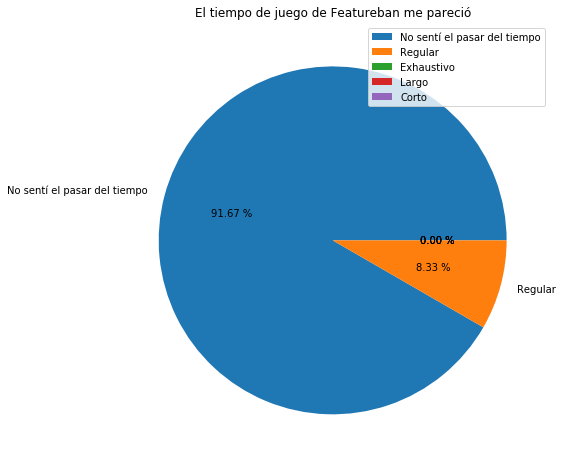

In [106]:
satisfaccion_plot = data_posterior['El tiempo de juego de Featureban me pareció'].value_counts().plot(kind='pie', legend = True, autopct='%.2f %%', label = "", title = "El tiempo de juego de Featureban me pareció", figsize=(8, 8))

In [76]:
data_posterior['En general, el tiempo del taller me pareció'].value_counts()

No sentí el pasar del tiempo    11
Corto                            1
Exhaustivo                       0
Largo                            0
Regular                          0
Name: En general, el tiempo del taller me pareció, dtype: int64

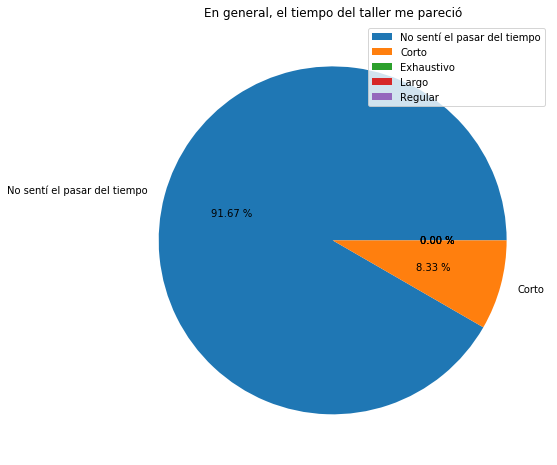

In [107]:
satisfaccion_plot = data_posterior['En general, el tiempo del taller me pareció'].value_counts().plot(kind='pie', legend = True, autopct='%.2f %%', label = "", title = "En general, el tiempo del taller me pareció", figsize=(8, 8))

In [78]:
data_posterior['Prefiero que el instructor explique la teoría'].value_counts()

Sus lecturas combinadas con juegos serios    11
Solo juegos serios                            1
Exclusivamente con lecturas                   0
Name: Prefiero que el instructor explique la teoría, dtype: int64

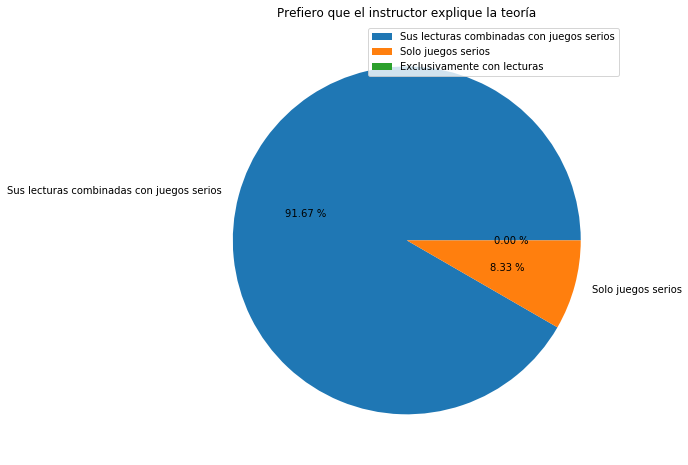

In [108]:
satisfaccion_plot = data_posterior['Prefiero que el instructor explique la teoría'].value_counts().plot(kind='pie', legend = True, autopct='%.2f %%', label = "", title = "Prefiero que el instructor explique la teoría", figsize=(8, 8))

In [80]:
data_posterior['En general, considero que los juegos serios son'].value_counts()

Esenciales         6
Necesarios         5
Sin importancia    1
Innecesarios       0
Name: En general, considero que los juegos serios son, dtype: int64

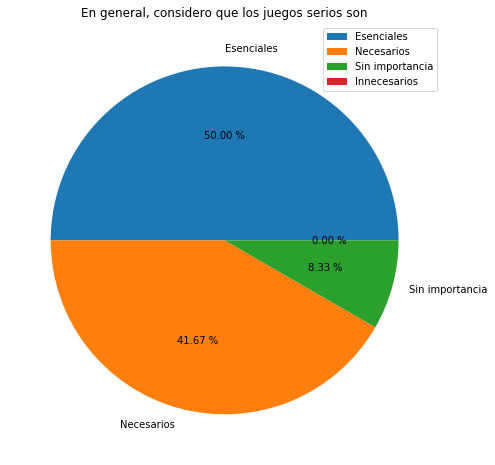

In [81]:
satisfaccion_plot = data_posterior['En general, considero que los juegos serios son'].value_counts().plot(kind='pie', autopct='%.2f %%', label = "", legend = True, title = "En general, considero que los juegos serios son", figsize=(8, 8))

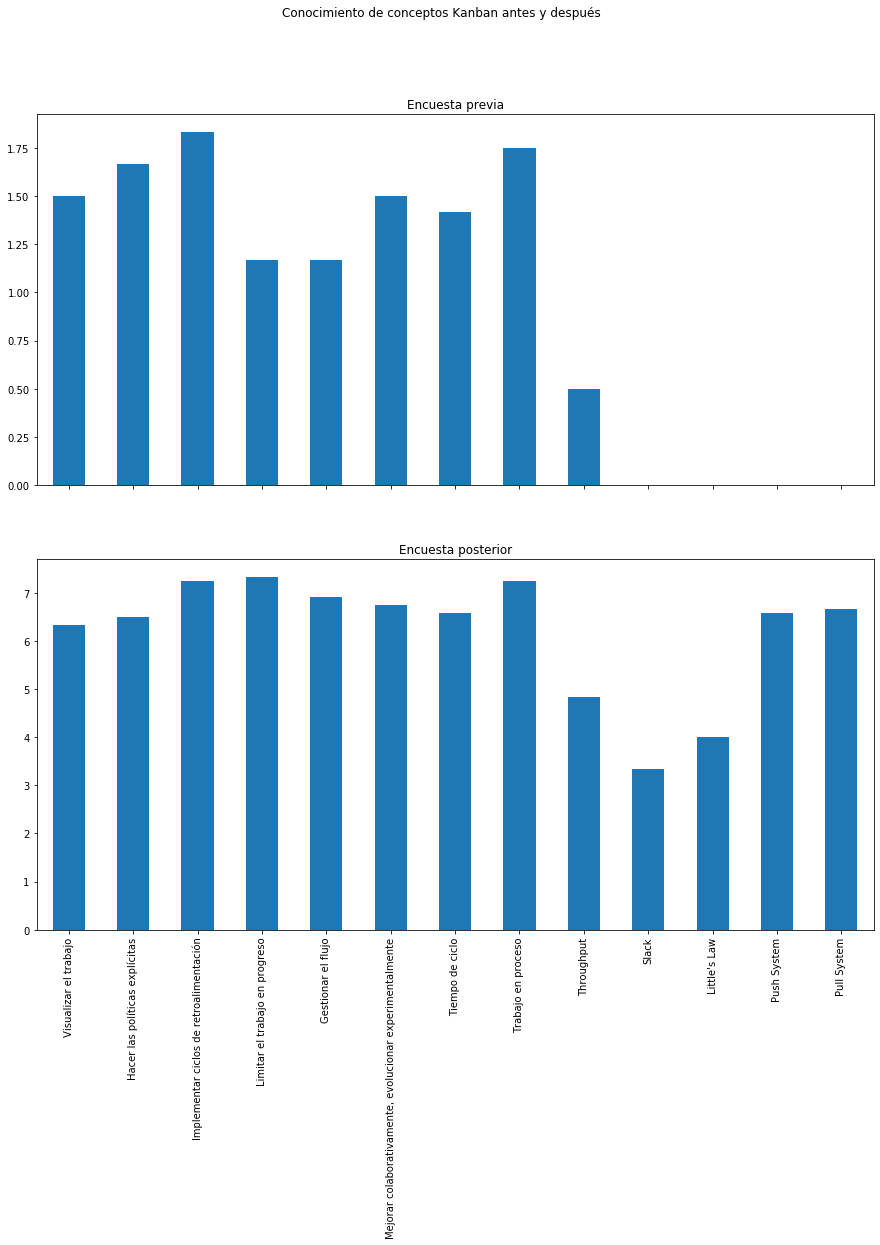

In [82]:
# Algunas comparaciones entre los resultados de ambas encuestas

# Comparación general
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después')
data_previa.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
data_posterior.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

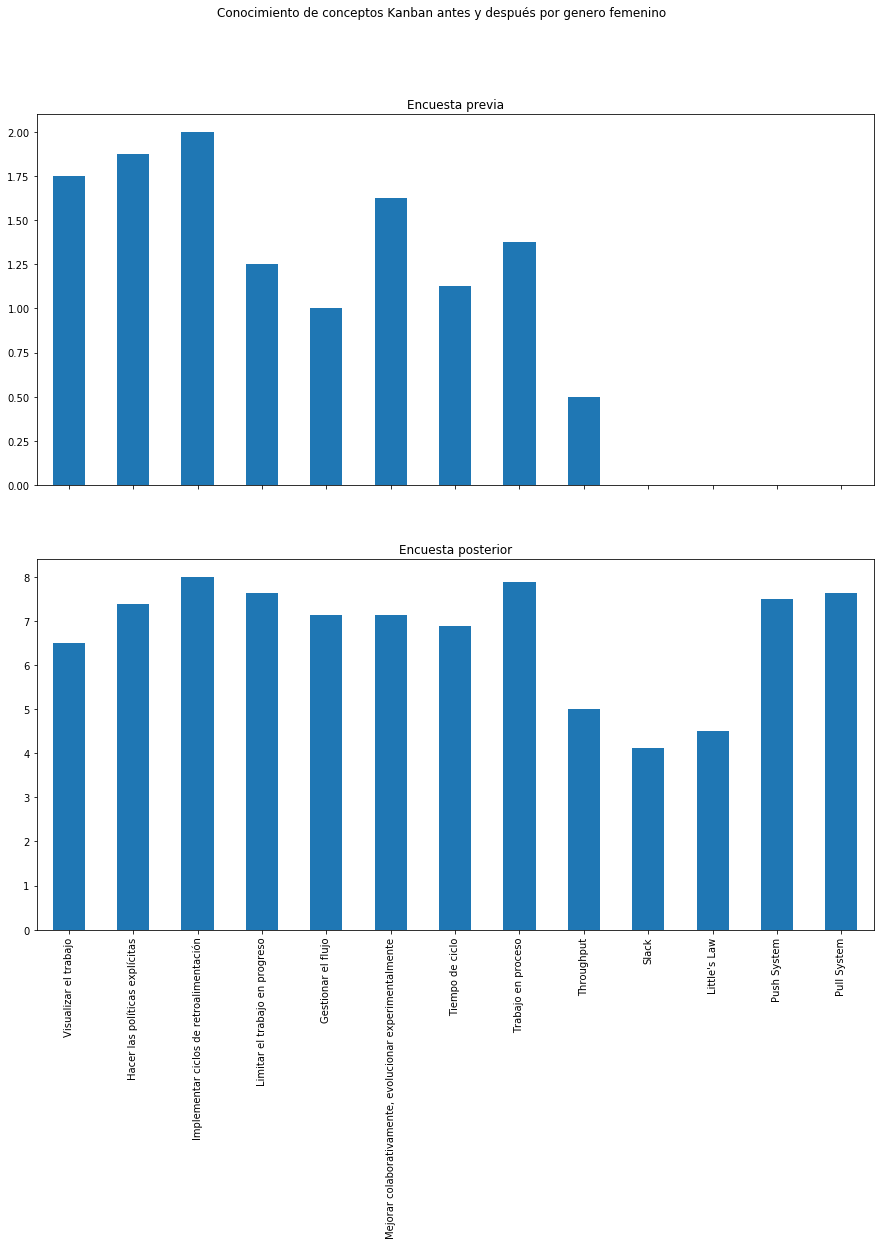

In [83]:
# Comparación por genero femenino
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después por genero femenino')
femenino.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
femenino_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

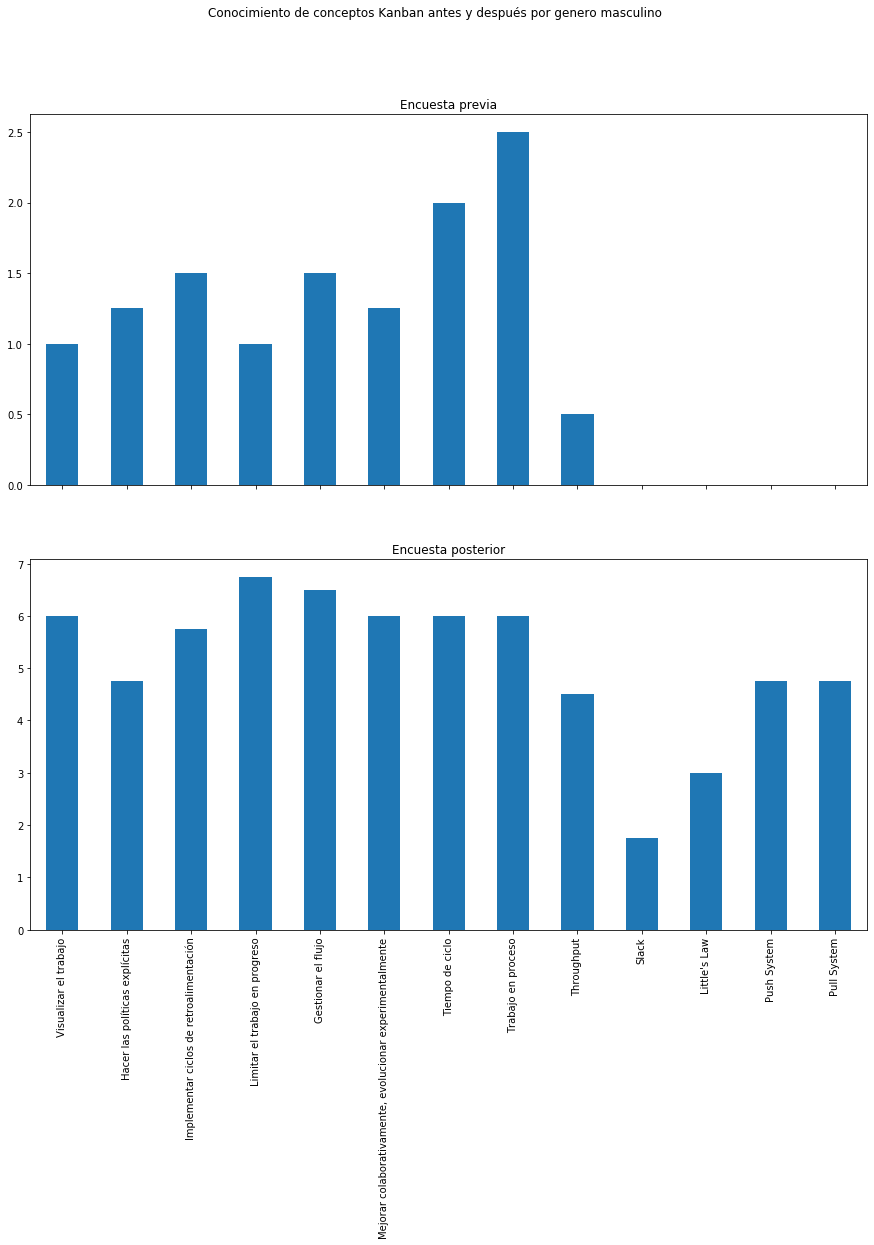

In [84]:
# Comparación por genero masculino
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después por genero masculino')
masculino.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
masculino_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

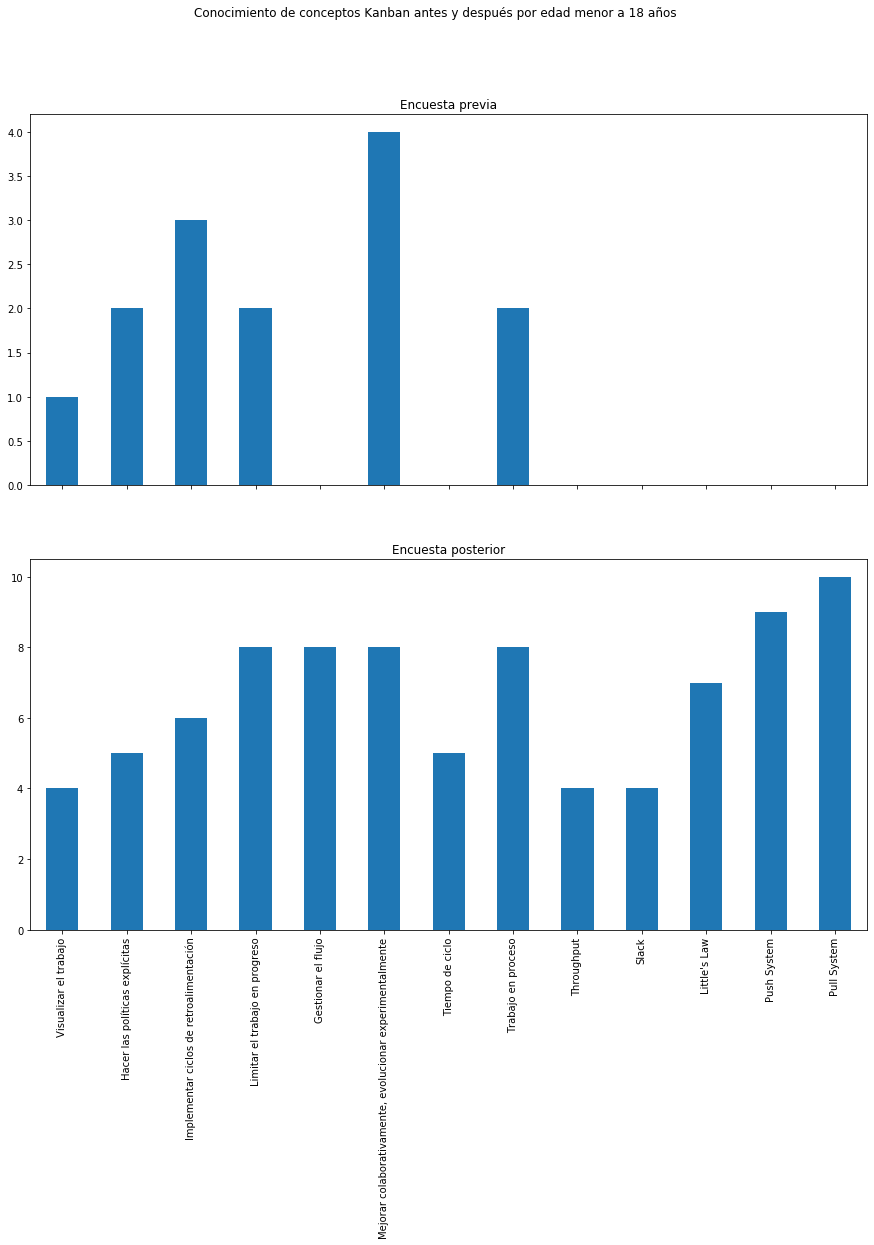

In [85]:
# Comparación por edad menor de 18 años
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después por edad menor a 18 años')
menor_18.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
menor_18_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

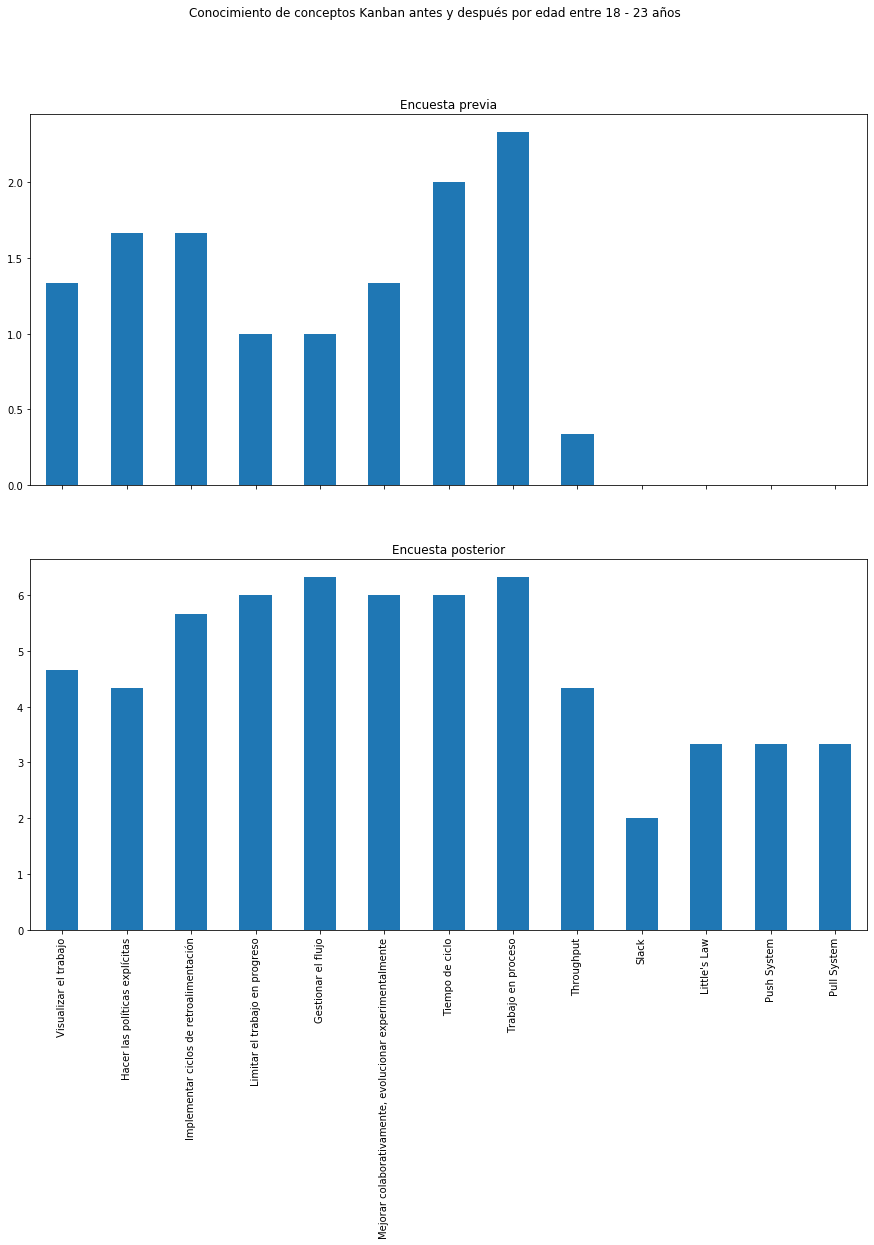

In [86]:
# Comparación por edad entre 18 - 23 años
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después por edad entre 18 - 23 años')
entre_18_23.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
entre_18_23_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

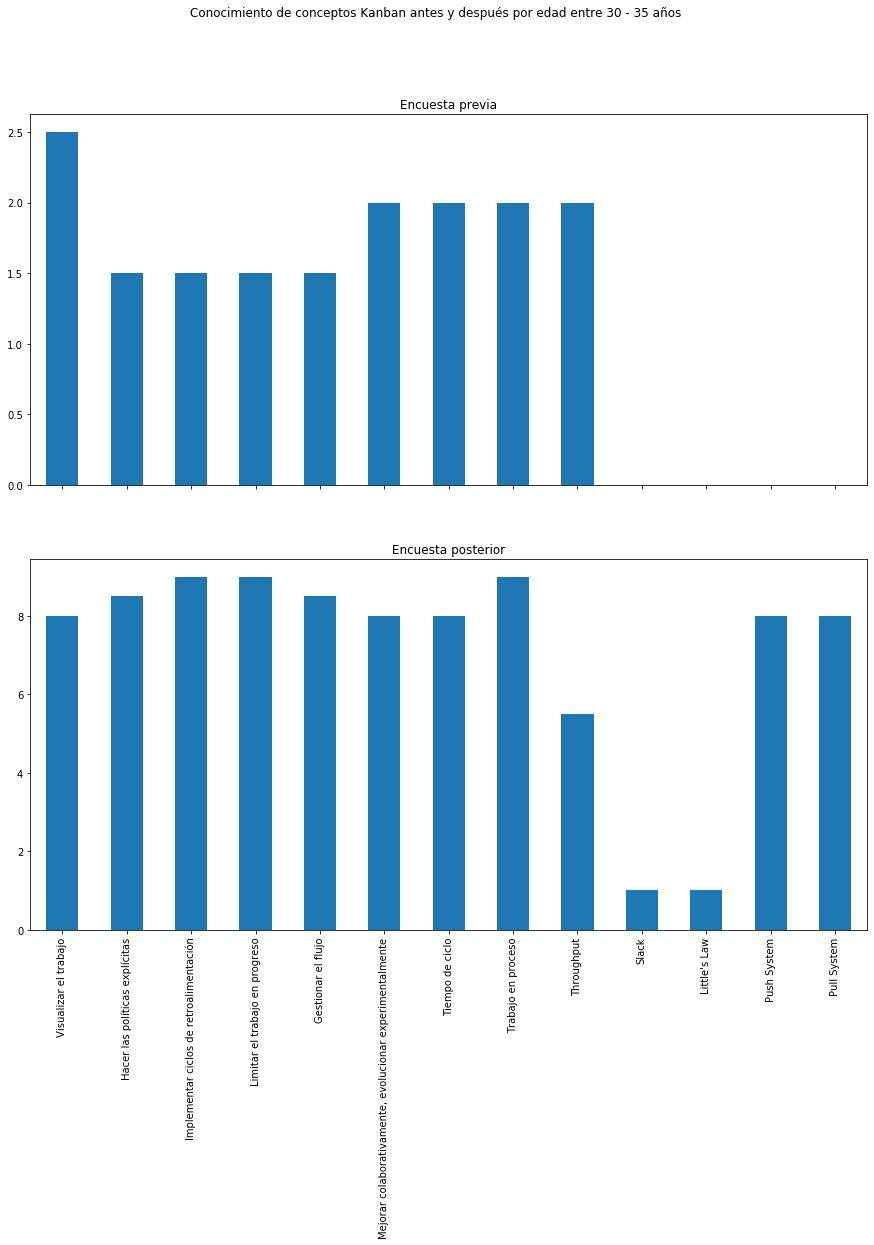

In [87]:
# Comparación por edad entre 30 - 35 años
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después por edad entre 30 - 35 años')
entre_30_35.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
entre_30_35_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

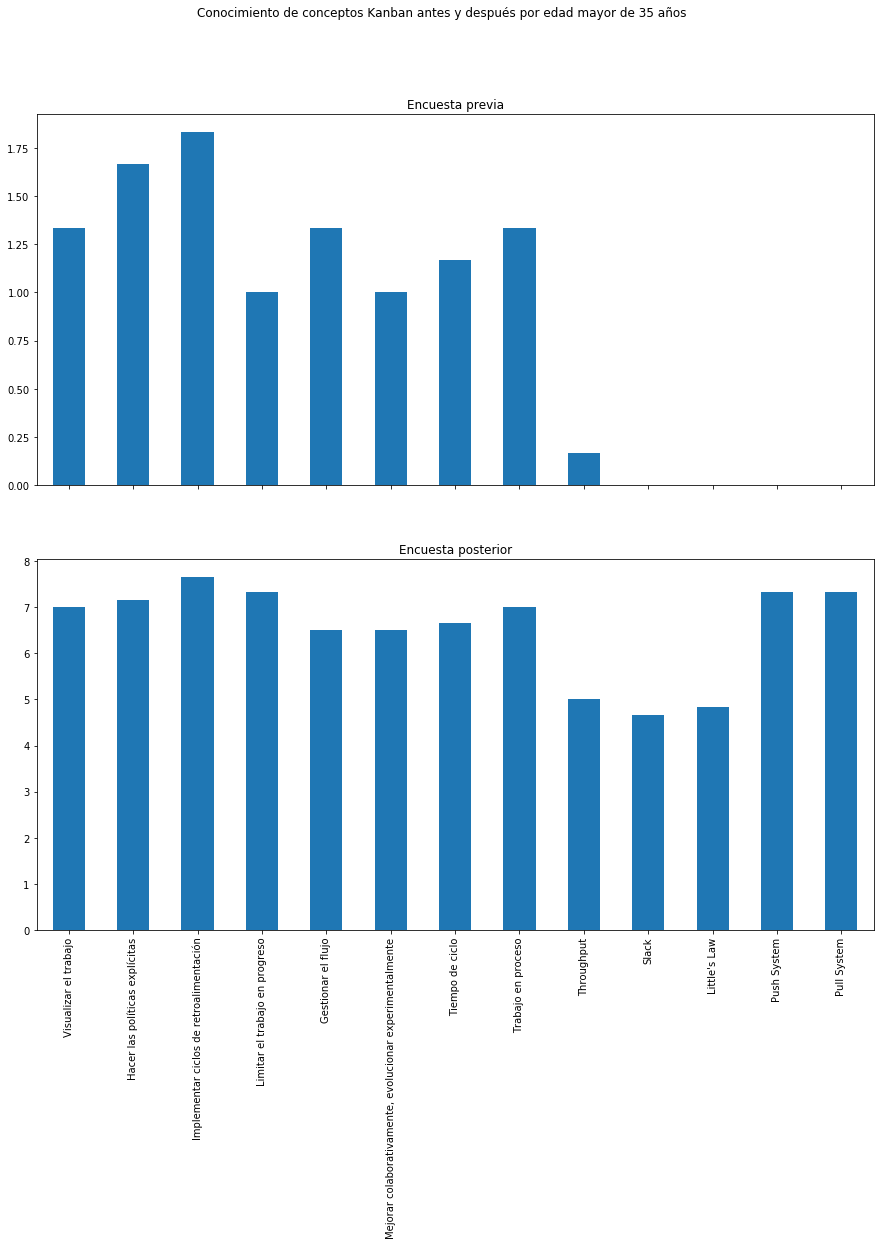

In [88]:
# Comparación por edad mayor de 35 años
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después por edad mayor de 35 años')
mayor_35.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
mayor_35_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

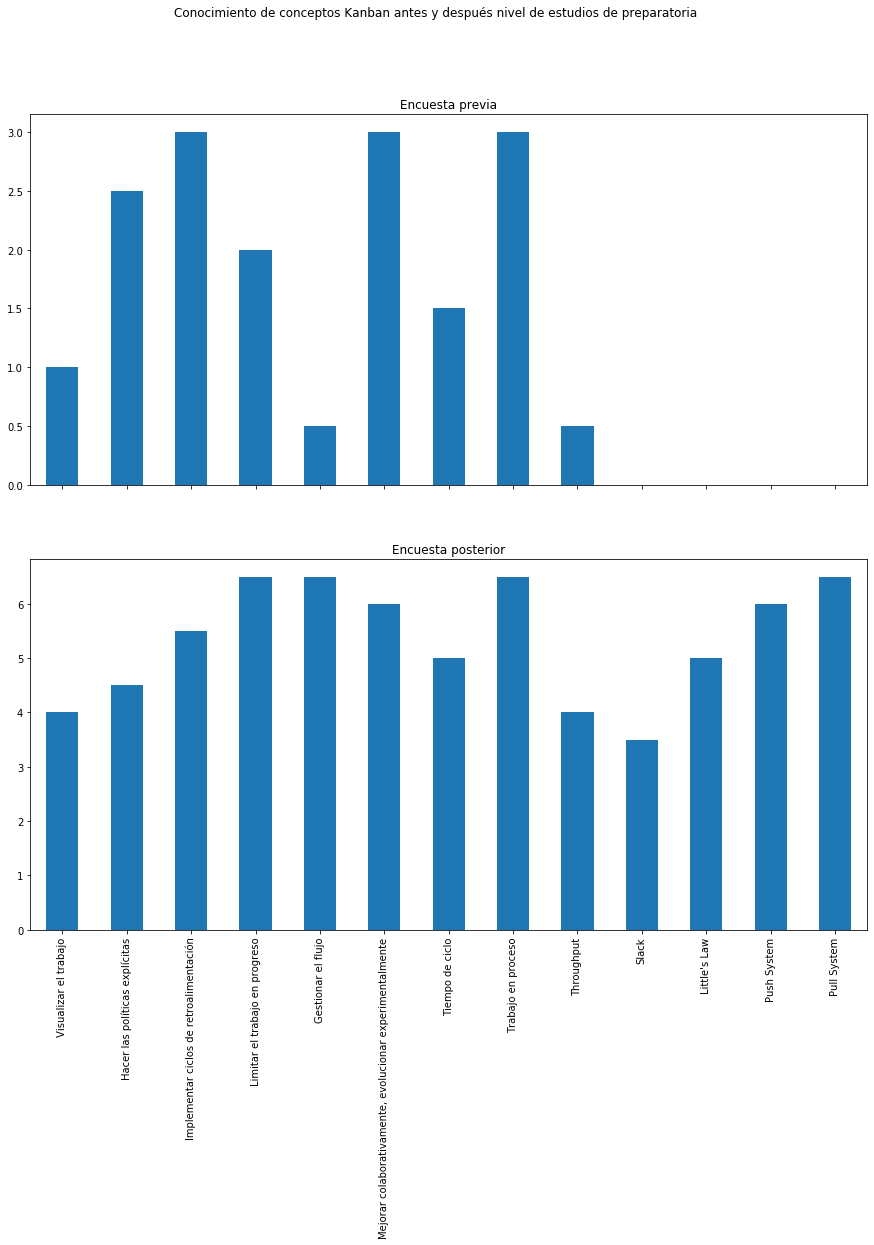

In [89]:
# Comparación por nivel de estudios de preparatoria
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después nivel de estudios de preparatoria')
preparatoria.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
preparatoria_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

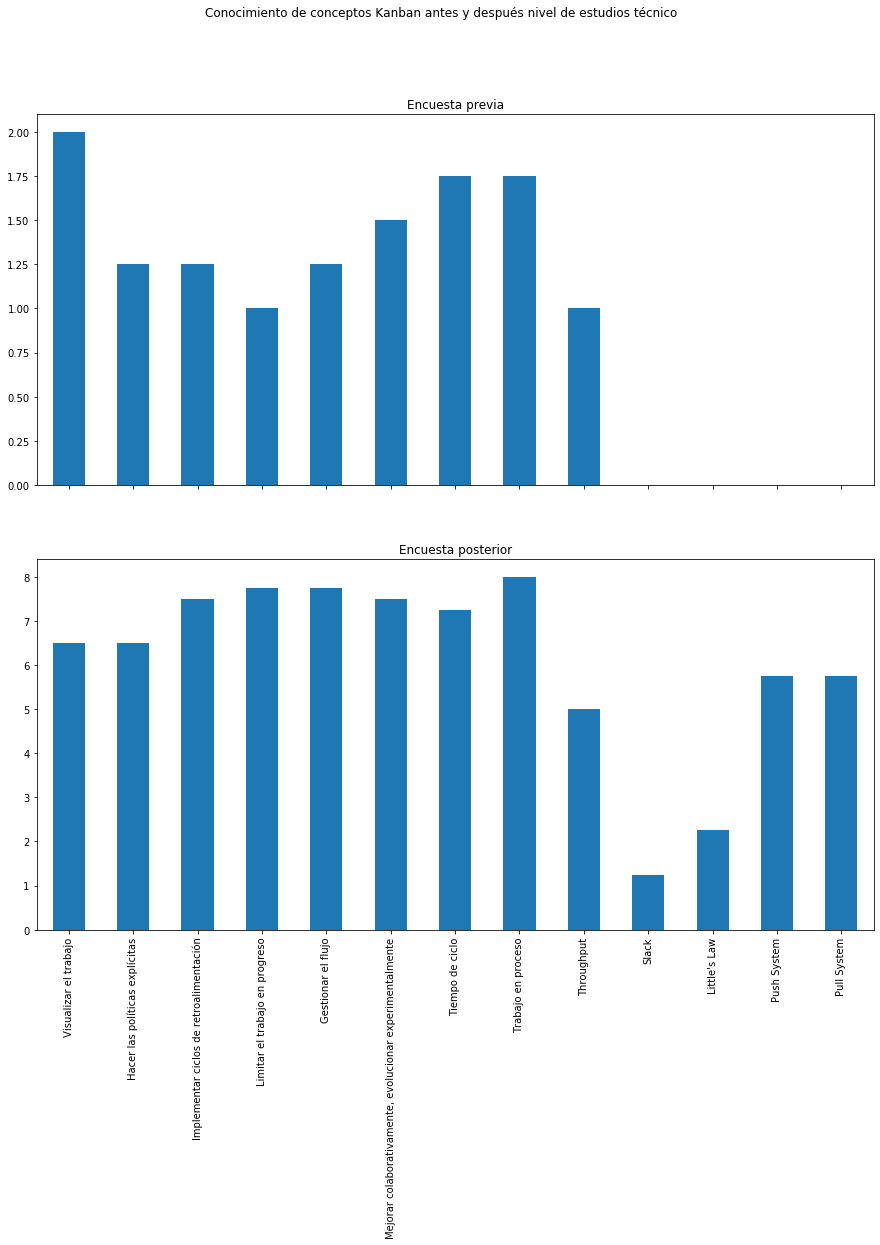

In [90]:
# Comparación por nivel de estudios técnico
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después nivel de estudios técnico')
tecnico.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
tecnico_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")

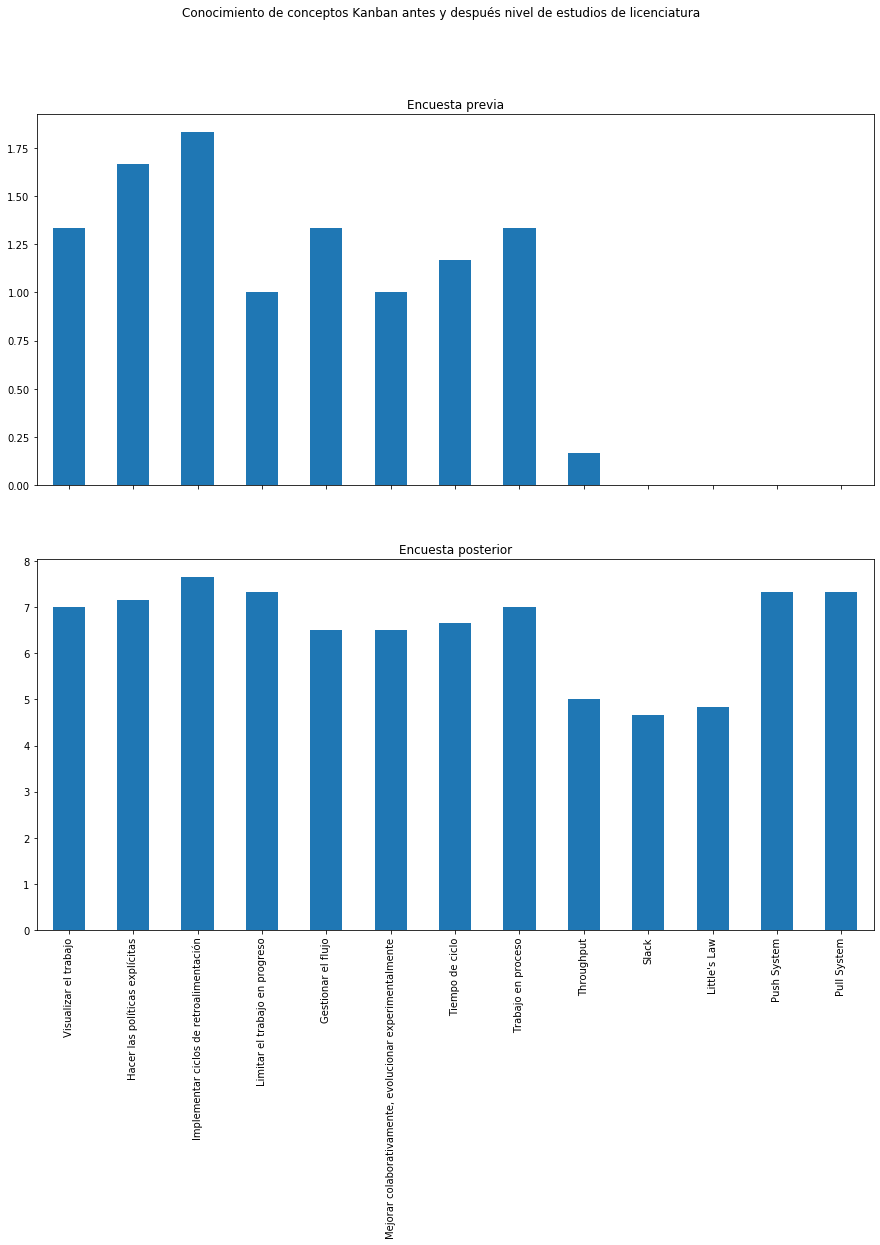

In [93]:
# Comparación por nivel de estudios de licenciatura
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15, 15))

fig.suptitle('Conocimiento de conceptos Kanban antes y después nivel de estudios de licenciatura')
licenciatura.mean().plot(ax=axes[0], kind = "bar", title = "Encuesta previa")
licenciatura_post.mean().plot(ax=axes[1], kind = "bar", title = "Encuesta posterior")